# **Project Name : Airline Paasenger Referral Prediction(Classification)**

# **Project Summary**

The project aims to predict whether a passenger referred by an existing customer will book a flight or not, based on various features such as seat comfort, cabin service, travel class,food beverage , entertainment service, etc. The prediction model is developed using classification techniques in machine learning.The use of machine learning techniques allows for the development of a model that can learn from historical passenger and booking data and make accurate predictions on new data. The model can be used by airlines to target marketing campaigns towards potential passengers who are likely to book a flight based on a referral from an existing customer.

# 1.**Know Your Data**

## import libraries


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno
import warnings
warnings.filterwarnings('ignore')

In [2]:
# libraries for model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.preprocessing import LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [3]:
# libraries for model_evaluation
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import recall_score,f1_score,roc_curve,roc_auc_score,precision_score

## **Objective**

In [4]:
df=pd.read_excel('data_airline_reviews.xlsx')

The given data includes airline reviews from 2016 to 2019 for popular airlines around the world with multiple choice and free text questions.
Data is scrapped in spring2019.The main objective is to predict whether passengers will refer the airline to their friends.

## **Dataset Overview**

In [5]:
df.head()

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Turkish Airlines,7.0,Christopher Hackley,8th May 2019,âœ… Trip Verified | London to Izmir via Istanb...,NaN,Business,Economy Class,London to Izmir via Istanbul,2019-05-01 00:00:00,4.0,5.0,4.0,4.0,2.0,4.0,yes
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Turkish Airlines,2.0,Adriana Pisoi,7th May 2019,âœ… Trip Verified | Istanbul to Bucharest. We ...,NaN,Family Leisure,Economy Class,Istanbul to Bucharest,2019-05-01 00:00:00,4.0,1.0,1.0,1.0,1.0,1.0,no
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## **Data Rows And Columns Count**

In [6]:
df.shape

(131895, 17)

Total 131895 rows and 17 columns are present in our dataset.

## **Dataset Information**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131895 entries, 0 to 131894
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          65947 non-null  object 
 1   overall          64017 non-null  float64
 2   author           65947 non-null  object 
 3   review_date      65947 non-null  object 
 4   customer_review  65947 non-null  object 
 5   aircraft         19718 non-null  object 
 6   traveller_type   39755 non-null  object 
 7   cabin            63303 non-null  object 
 8   route            39726 non-null  object 
 9   date_flown       39633 non-null  object 
 10  seat_comfort     60681 non-null  float64
 11  cabin_service    60715 non-null  float64
 12  food_bev         52608 non-null  float64
 13  entertainment    44193 non-null  float64
 14  ground_service   39358 non-null  float64
 15  value_for_money  63975 non-null  float64
 16  recommended      64440 non-null  object 
dtypes: float64

## **Check Duplicate Values**

## **Check Duplicate Values**

In [8]:
df.duplicated().value_counts()

True     70711
False    61184
Name: count, dtype: int64

In [9]:
# getting the duplicated values
print(f"Duplicated data count = {df[df.duplicated()].shape[0]}")

Duplicated data count = 70711


In [10]:
# droping the duplicates values
df=df.drop_duplicates()
df

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Turkish Airlines,7.0,Christopher Hackley,8th May 2019,âœ… Trip Verified | London to Izmir via Istanb...,NaN,Business,Economy Class,London to Izmir via Istanbul,2019-05-01 00:00:00,4.0,5.0,4.0,4.0,2.0,4.0,yes
3,Turkish Airlines,2.0,Adriana Pisoi,7th May 2019,âœ… Trip Verified | Istanbul to Bucharest. We ...,NaN,Family Leisure,Economy Class,Istanbul to Bucharest,2019-05-01 00:00:00,4.0,1.0,1.0,1.0,1.0,1.0,no
5,Turkish Airlines,3.0,M Galerko,7th May 2019,âœ… Trip Verified | Rome to Prishtina via Ista...,NaN,Business,Economy Class,Rome to Prishtina via Istanbul,2019-05-01 00:00:00,1.0,4.0,1.0,3.0,1.0,2.0,no
7,Turkish Airlines,10.0,Zeshan Shah,6th May 2019,âœ… Trip Verified | Flew on Turkish Airlines I...,A330,Solo Leisure,Economy Class,Washington Dulles to Karachi,April 2019,4.0,5.0,5.0,5.0,5.0,5.0,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131886,Ukraine International,NaN,Yevheniy Kahanovych,21st January 2007,Two domestic flights between Kiev and Lviv las...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
131888,Ukraine International,NaN,Helen Lee,15th December 2006,I had a good flight from London to Kiev with U...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
131890,Ukraine International,NaN,Andriy Yesypenko,19th May 2006,Kiev - London (Gatwick) in business class (in ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
131892,Ukraine International,NaN,Volodya Bilotkach,29th April 2006,Several flights - KBP to AMS (3 times one way)...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no


In [11]:
# count duplicate sum
df.duplicated().sum()

np.int64(0)

## Missng Values / Null Values

In [12]:
df.isnull().sum()

airline                1
overall             1783
author                 1
review_date            1
customer_review        1
aircraft           42696
traveller_type     23644
cabin               2479
route              23671
date_flown         23750
seat_comfort        4973
cabin_service       4944
food_bev           12843
entertainment      20954
ground_service     24015
value_for_money     1857
recommended         1423
dtype: int64

<Axes: >

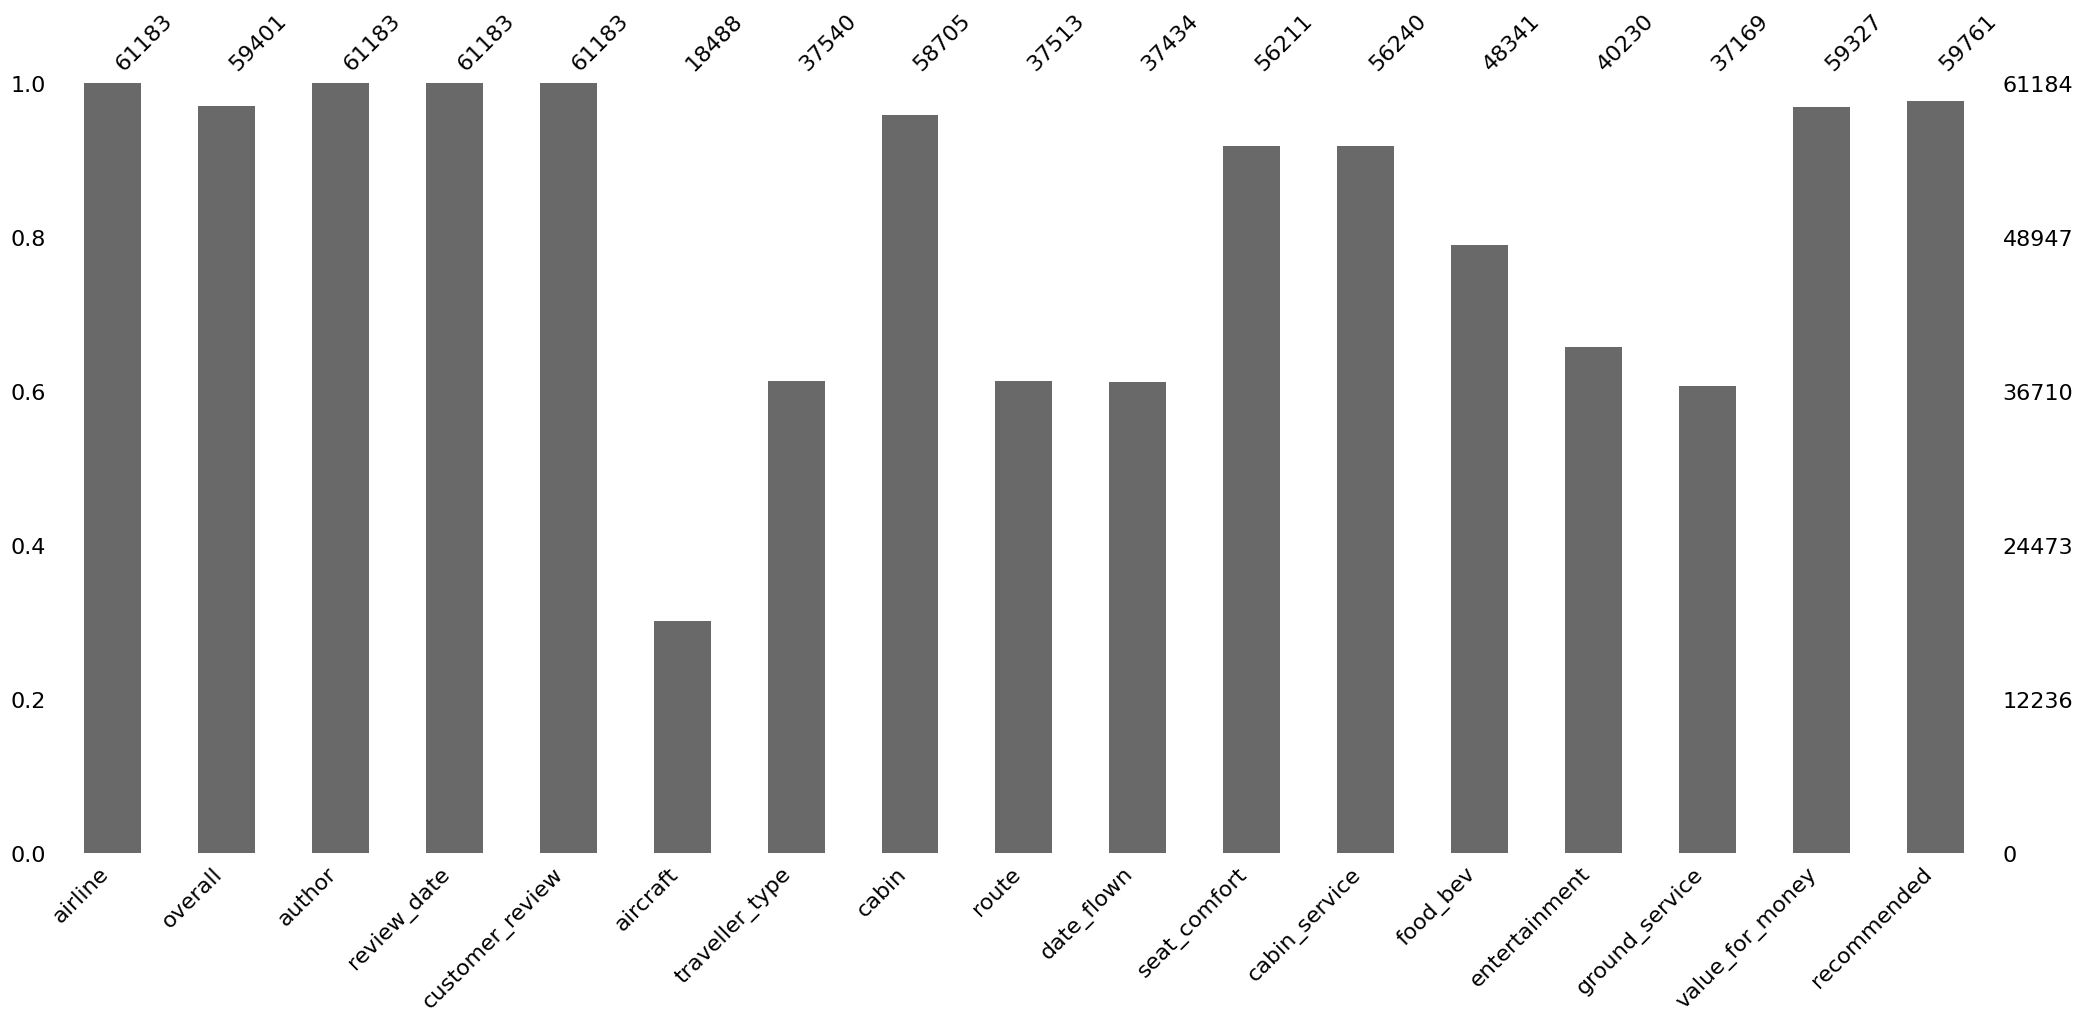

In [13]:
# Visualization of missing values
msno.bar(df)

As we can see from the graph that our aircraft & ground_service columns contains most of the null values within the dataset.

**What did you know about the dataset?**

* There are 131895 total records with 17 different features.
* All the features like aircraft,author and airline null values.
* There are duplicate values i.e 70711 duplicate data.

# **2. Understanding the Variables**

In [14]:
# Dataset columns
print(f'Features: {df.columns.to_list()}')

Features: ['airline', 'overall', 'author', 'review_date', 'customer_review', 'aircraft', 'traveller_type', 'cabin', 'route', 'date_flown', 'seat_comfort', 'cabin_service', 'food_bev', 'entertainment', 'ground_service', 'value_for_money', 'recommended']


#### **Variable Description**
•	airline:Name of the airline

•	overall : Overall point is given to the trip between 1 to 10.

•	author : Author of the trip

•	review_date : Date of the Review

•	customer_review : Review of the customers in free text format

•	aircraft : Type of the aircraft

•	traveller_type : Type of traveller(e.g. business,lesisure)

•	cabin : Cabin at the flight date flowan: Flight date

•	seat_comfort : Rated between 1-5

•	cabin_service : Rated between 1-5

•	food_bev : Rated between 1-5

•	entertainment : Rated between 1-5

•	ground_service : Rated between 1-5

•	value_for_money : Rated between 1-5

•	recommended : Binary, target variable

In [15]:
# seggregating all the numerical and categorical features
numeric_col=df.select_dtypes(include=['Int64','float64']).columns.tolist()
categorical_col=df.select_dtypes(include=['O']).columns.tolist()

### Check Unique value for each variable

In [16]:
for i in df.columns.tolist():
  print(f'Number of Unique value in {i} is {df[i].nunique()}.')

Number of Unique value in airline is 81.
Number of Unique value in overall is 10.
Number of Unique value in author is 44069.
Number of Unique value in review_date is 3015.
Number of Unique value in customer_review is 61172.
Number of Unique value in aircraft is 2088.
Number of Unique value in traveller_type is 4.
Number of Unique value in cabin is 4.
Number of Unique value in route is 24549.
Number of Unique value in date_flown is 63.
Number of Unique value in seat_comfort is 5.
Number of Unique value in cabin_service is 5.
Number of Unique value in food_bev is 5.
Number of Unique value in entertainment is 5.
Number of Unique value in ground_service is 5.
Number of Unique value in value_for_money is 5.
Number of Unique value in recommended is 2.


# **3.EDA**

### **Char1 : Distribution Of Numerical Columns**

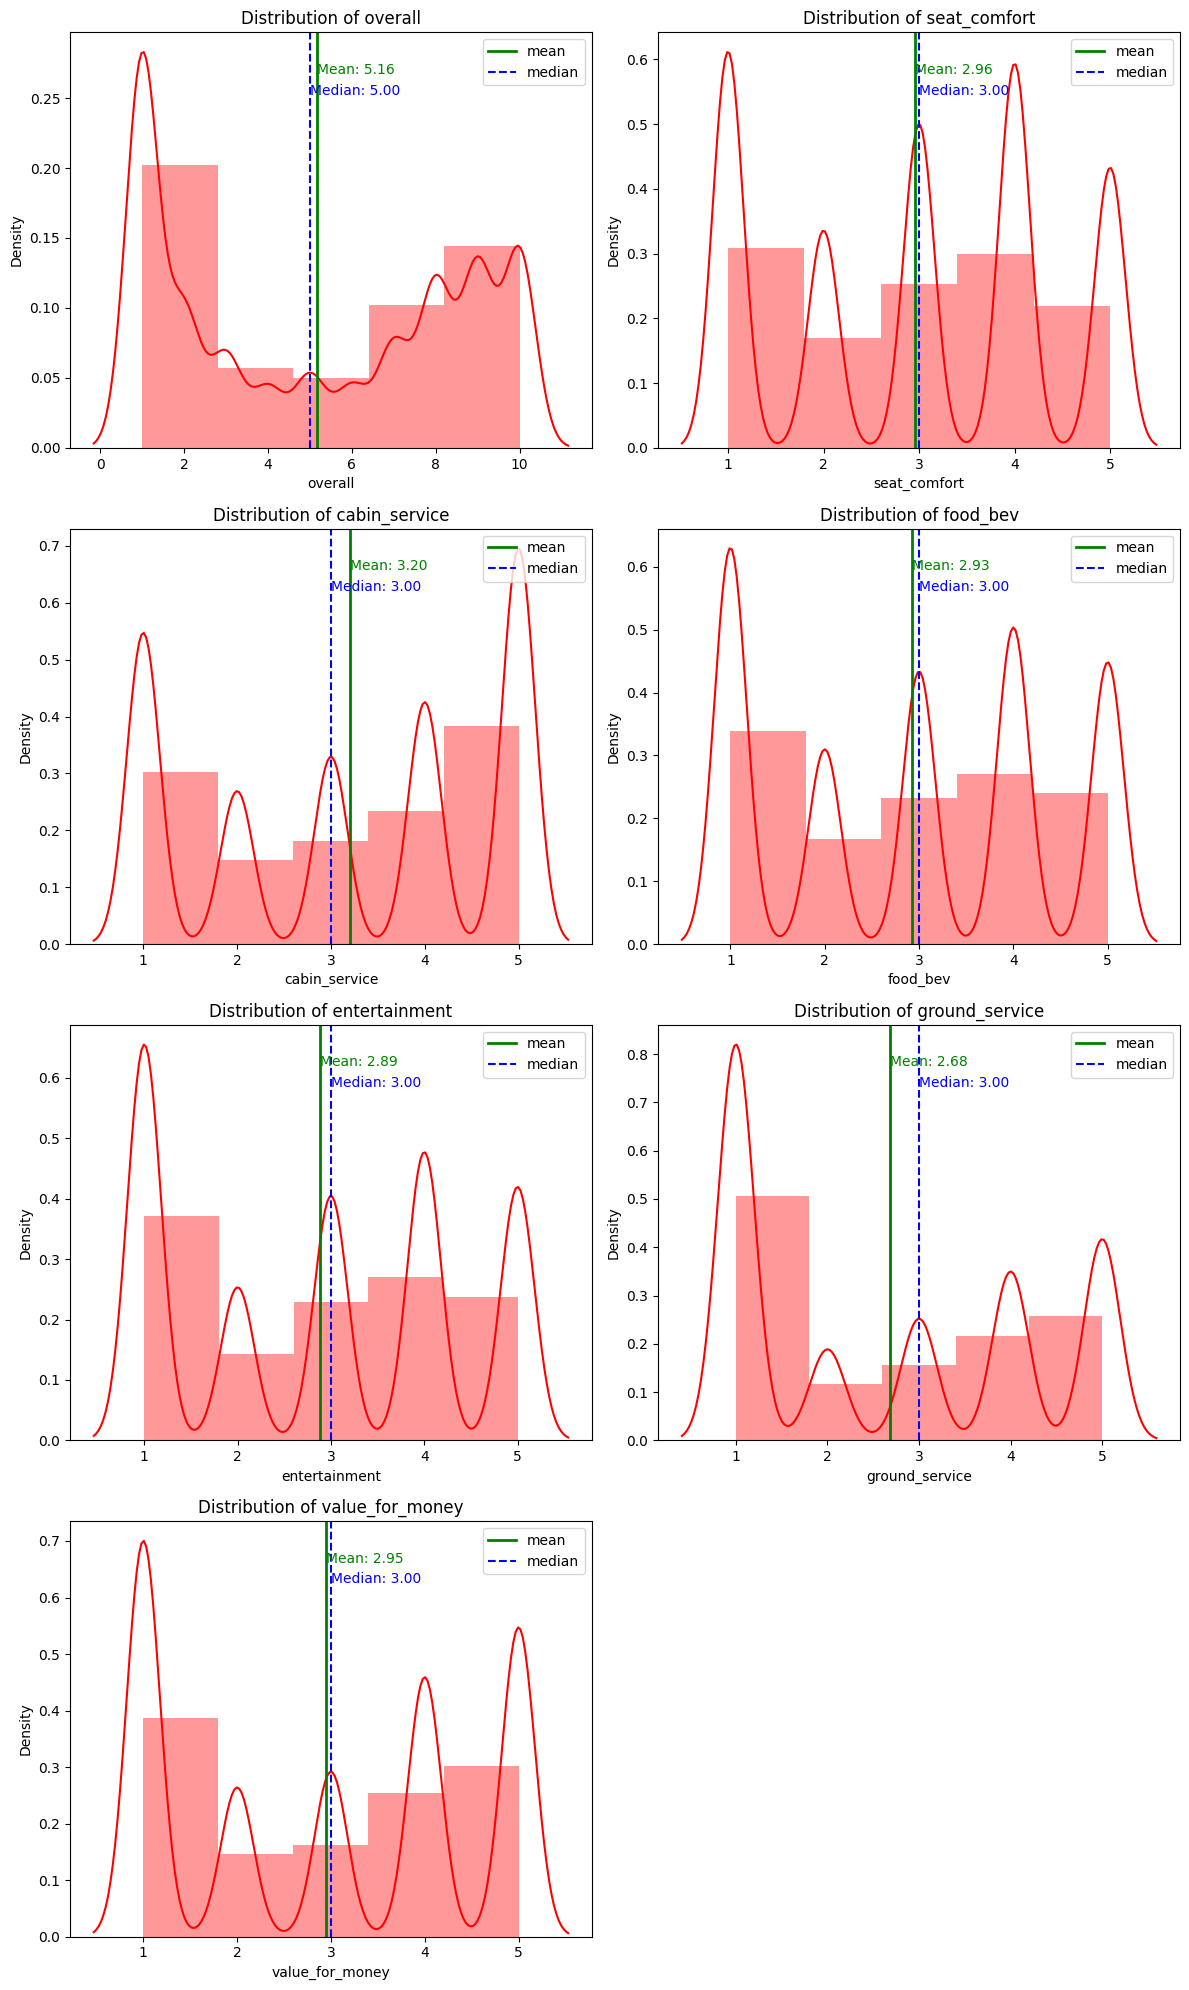

In [17]:
# Determine the number of rows and columns for subplots
n_cols = 2
n_rows = (len(numeric_col) + n_cols - 1) // n_cols

plt.figure(figsize=(12, n_rows * 5)) # Adjust figure size based on number of rows

for i, col in enumerate(numeric_col):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.distplot(df[col], kde=True, bins=5, color='r')

    # Plotting the mean and the median.
    plt.axvline(df[col].mean(), color='green', linewidth=2, label='mean')
    plt.axvline(df[col].median(), color='blue', linestyle='dashed', linewidth=1.5, label='median')

    # Add text labels for mean and median
    plt.text(df[col].mean(), plt.ylim()[1]*0.9, f'Mean: {df[col].mean():.2f}', color='green', ha='left')
    plt.text(df[col].median(), plt.ylim()[1]*0.85, f'Median: {df[col].median():.2f}', color='blue', ha='left')

    plt.legend(bbox_to_anchor = (1.0, 1), loc = 'upper right')
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

* We can say most passenger give overall avg rating of around 5 .
* Most of the people give seat_comfort an avg rating of 3.
* Most of the people give cabin_service an avg rating of around 3.2.
* Most of the people give food_bev an avg rating of around 3.
* Most of the people give entertainment an avg rating of around 2.9.
* Most of the people give ground_service an avg rating of around 2.7
.
* Most of the people give value_for_money rating around 3.

### **Chart 2 : Frequency plot of each Categorical Varibale**



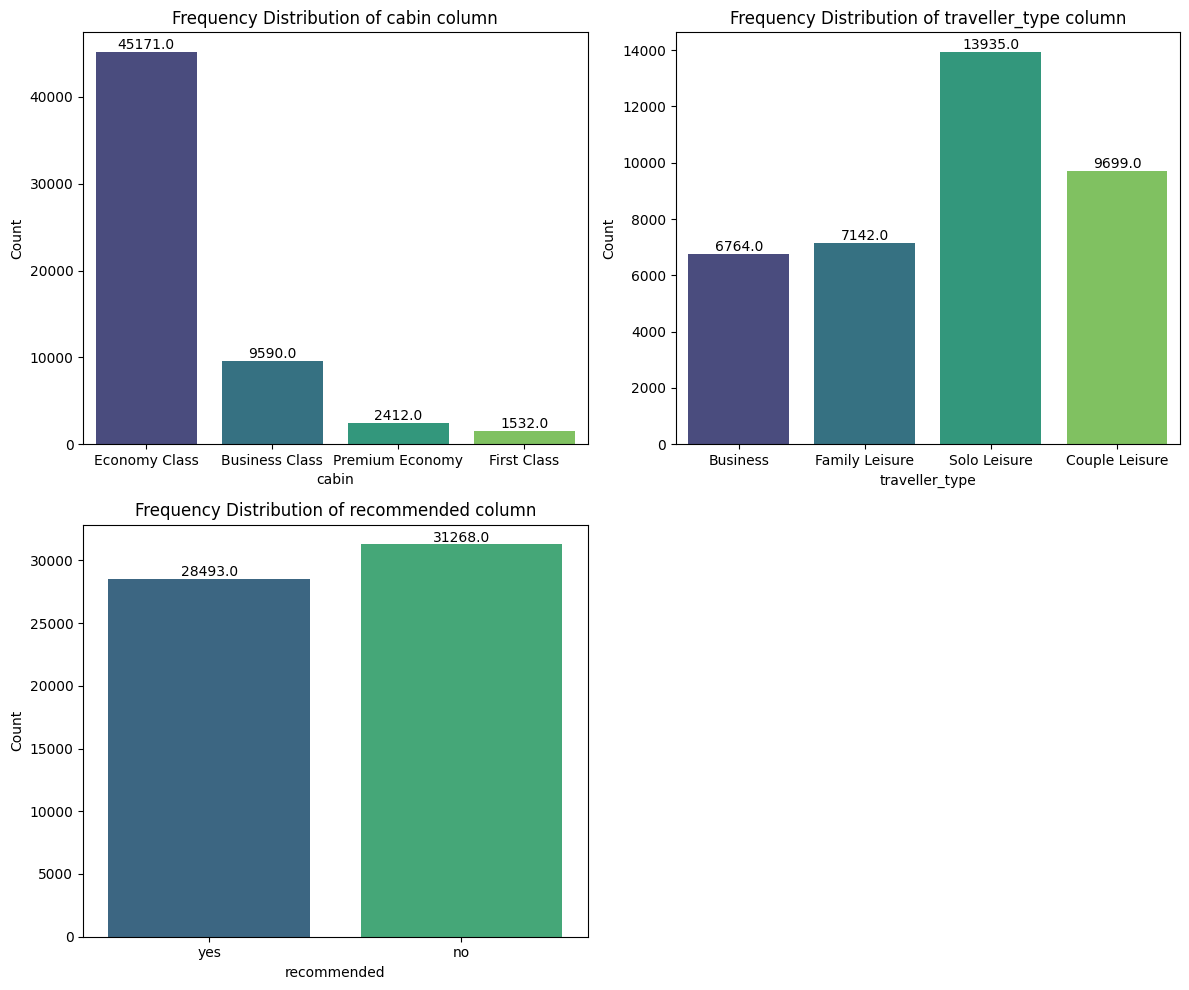

In [18]:
cat_features =['cabin','traveller_type','recommended']

n_cols = 2
n_rows = (len(cat_features) + n_cols - 1) // n_cols

plt.figure(figsize=(12, n_rows * 5)) # Create a single figure for all subplots

for i,cols in enumerate(cat_features):
  ax = plt.subplot(n_rows, n_cols, i + 1)
  sns.countplot(x=df[cols],palette='viridis', ax=ax)
  plt.title(f"Frequency Distribution of {cols} column")
  plt.xlabel(cols)  # Add x-axis label
  plt.ylabel("Count")  # Add y-axis label


  # Add data labels
  for p in ax.patches:
      ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                  ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.tight_layout() # Adjust layout to prevent overlapping titles/labels
plt.show()

### **Chart 3 : Outliers of each Numerical Varibale**


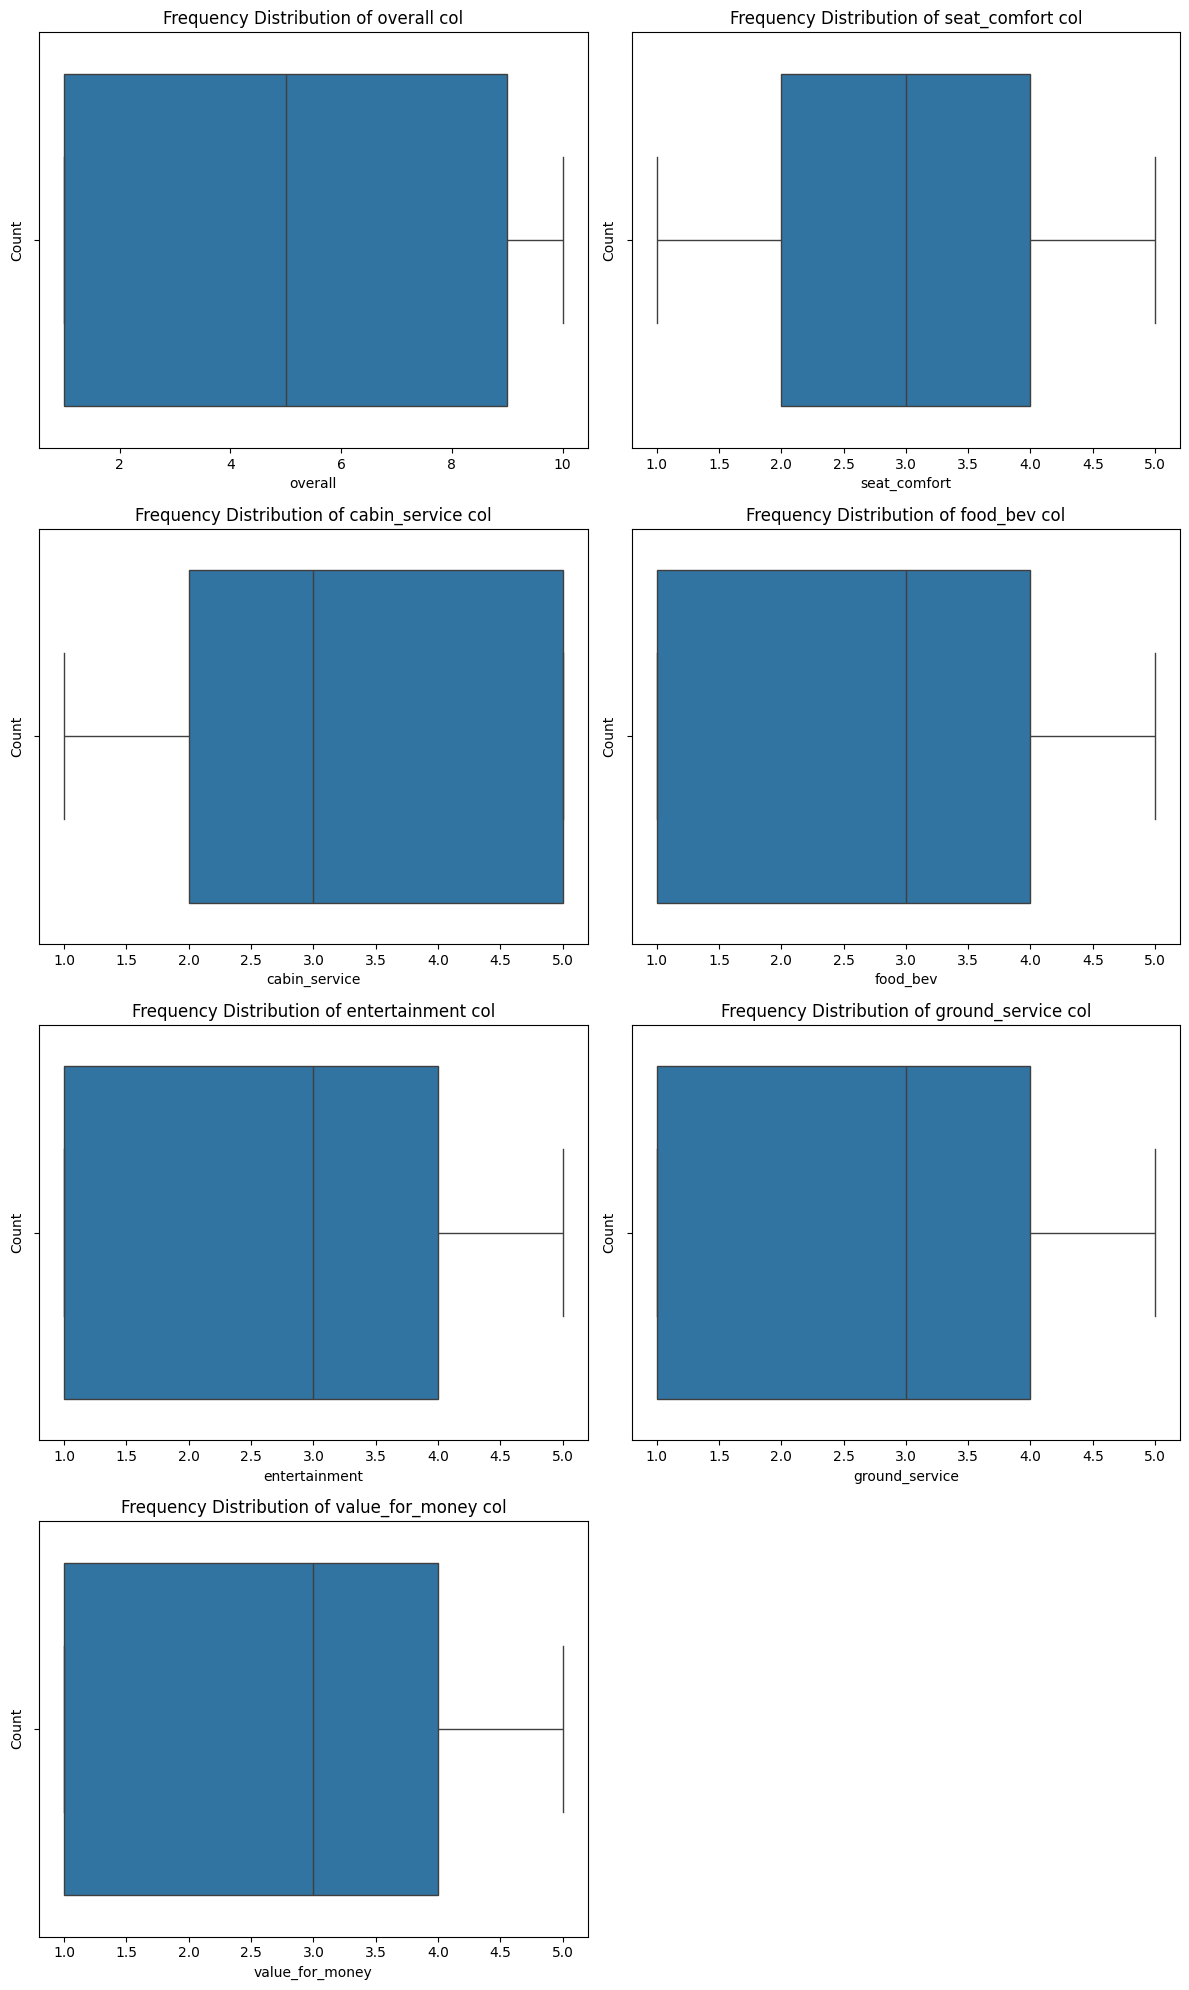

In [19]:
n_cols = 2
n_rows = (len(numeric_col) + n_cols - 1) // n_cols

plt.figure(figsize=(12, n_rows * 5)) # Create a single figure for all subplots

for i,cols in enumerate(numeric_col):
  ax = plt.subplot(n_rows, n_cols, i + 1)
  sns.boxplot(x=df[cols])
  plt.title(f"Frequency Distribution of {cols} col")
  plt.xlabel(cols)  # Add x-axis label
  plt.ylabel("Count")  # Add y-axis label

plt.tight_layout() # Adjust layout to prevent overlapping titles/labels
plt.show()

### **Chart 4: How is correlation b/w the Numerical variable and target variable(Recommended)**

<Axes: >

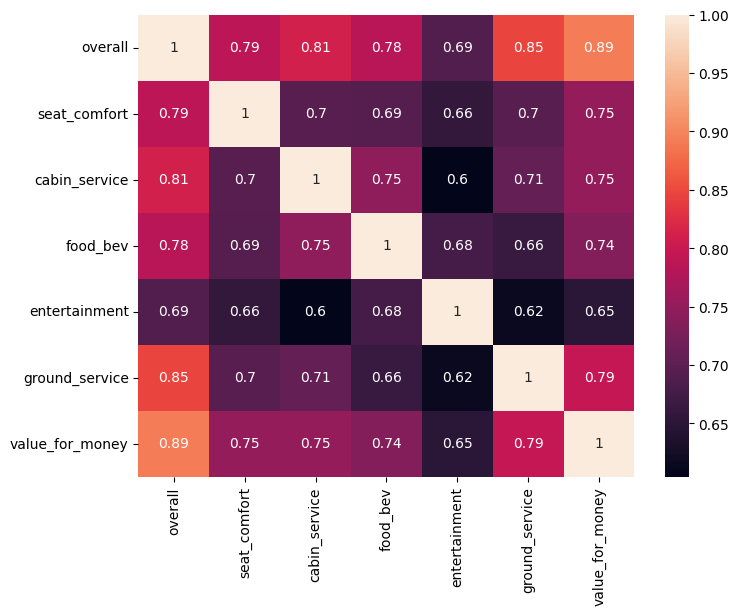

In [20]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True),annot=True)

### **Chart 5: Which traveller_type has more Avg Overall Rating**

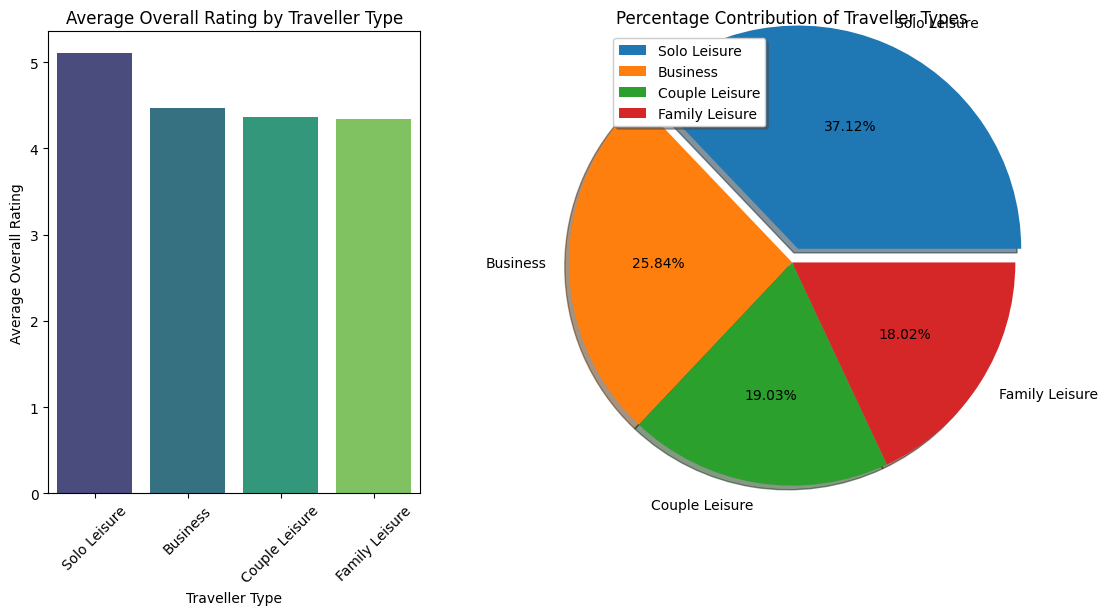

In [21]:
# Calculate the average overall rating for each traveller type
average_rating_by_traveller = df.groupby('traveller_type')['overall'].mean().sort_values(ascending=False)

# Create a figure with two subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Create a bar plot in the first subplot
sns.barplot(x=average_rating_by_traveller.index, y=average_rating_by_traveller.values, palette='viridis', ax=axes[0])
axes[0].set_title('Average Overall Rating by Traveller Type')
axes[0].set_xlabel('Traveller Type')
axes[0].set_ylabel('Average Overall Rating')
axes[0].tick_params(axis='x', rotation=45)




# showing the pct contribution Overall Ratings By Traveller Type
label_for_traveller=average_rating_by_traveller.index
data=df['traveller_type'].value_counts().values
explode=[0.1,0,0,0]
axes[1].axis('equal')
axes[1].pie(data, labels = label_for_traveller,explode=explode,radius=1.5,autopct='%0.2f%%',shadow=True,textprops={'fontsize': 10})
axes[1].legend(loc='upper left',shadow=True,fancybox=True)
axes[1].set_title('Percentage Contribution of Traveller Types',)

# Adjust layout using subplots_adjust
fig.subplots_adjust(wspace=0.5) # Adjust the width space between subplots
plt.show()

* We can conclude that ,Solo Lesisure has the highest value counts, we can  conclude that most people who travel by airline travel is solo.37.22% people who travel by airline is solo.Followed by couple and family.

**Chart 5: Which type of Cabin has more recommendation?**

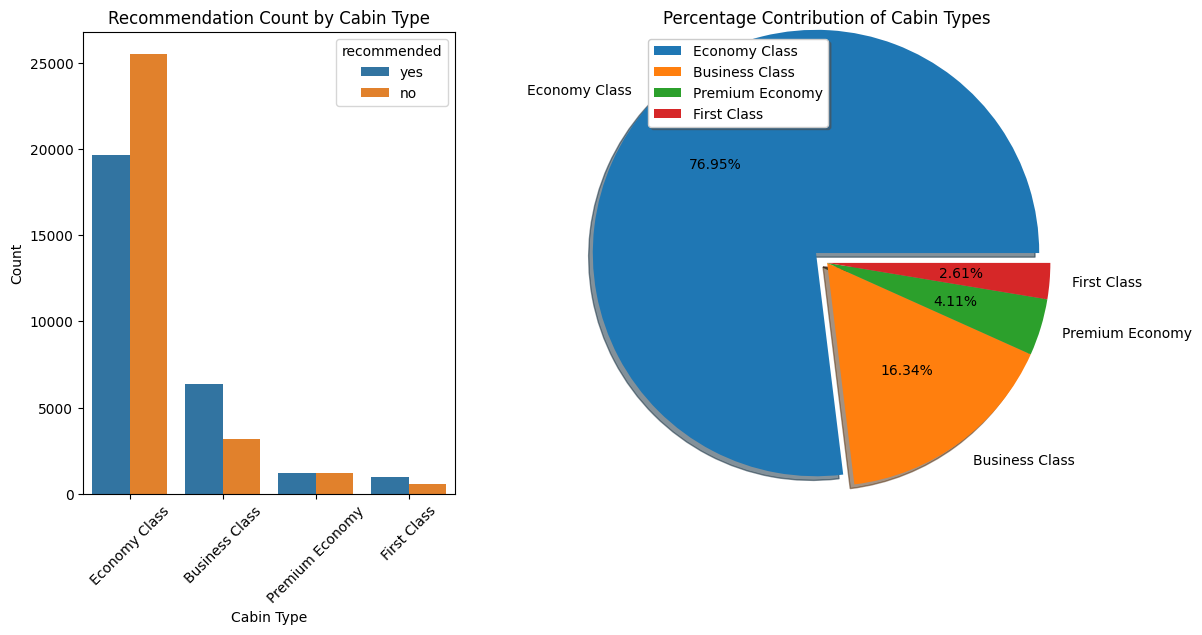


The frequency of recommendation that each cabin type has:
 cabin            recommended
Economy Class    no             25516
                 yes            19654
Business Class   yes             6386
                 no              3204
Premium Economy  yes             1207
                 no              1205
First Class      yes              961
                 no               571
Name: count, dtype: int64


In [22]:
# Create a figure with two subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot the count of recommendations by cabin type in the first subplot
sns.countplot(x=df['cabin'], hue=df['recommended'], ax=axes[0])
axes[0].set_title('Recommendation Count by Cabin Type')
axes[0].set_xlabel('Cabin Type')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=45)


# Plot the percentage contribution of each cabin type in the second subplot
label_for_cabin = df['cabin'].value_counts().index
data_cab = df['cabin'].value_counts().values
explode=[0.1,0,0,0]
axes[1].axis("equal")
axes[1].pie(data_cab, labels = label_for_cabin,explode=explode,radius=1.5,autopct='%0.2f%%',shadow=True,textprops={'fontsize': 10})
axes[1].legend(loc='upper left',shadow=True,fancybox=True)
axes[1].set_title('Percentage Contribution of Cabin Types')

# Adjust layout using subplots_adjust
fig.subplots_adjust(wspace=0.5)

plt.show()
print(f"\nThe frequency of recommendation that each cabin type has:\n", df[['cabin','recommended']].value_counts())

•	As we can see above graph,Economy class has the highest counts with bad ratings.

•	We can conclude that most of the people around 78.44% people choose economy class to travel by airline.Followed by Business class and others

### **Chart 6: Percentage of Cabin-Service Rating by passengers**

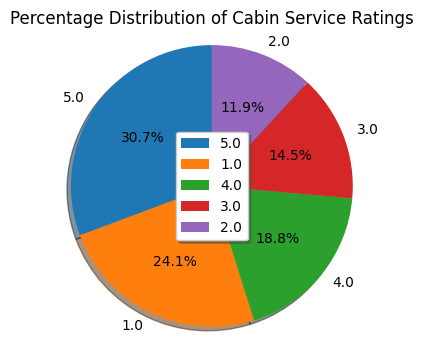

Percentage Distribution of Cabin Service Ratings:
cabin_service
5.0    30.702347
1.0    24.141181
4.0    18.764225
3.0    14.528805
2.0    11.863442
Name: proportion, dtype: float64


In [23]:
# Calculate the frequency distribution of cabin_service ratings
cabin_service_ratings = df['cabin_service'].value_counts(normalize=True) * 100

# Create a pie chart
plt.figure(figsize=(4, 4))
plt.pie(cabin_service_ratings, labels=cabin_service_ratings.index, autopct='%1.1f%%', startangle=90, shadow=True)
plt.title('Percentage Distribution of Cabin Service Ratings')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(loc='center',shadow=True,fancybox=True)
plt.show()

print("Percentage Distribution of Cabin Service Ratings:")
print(cabin_service_ratings)

•	26% passengers are not satisfied with cabin-service as they give 1.0 rating.

•	50% passenger are giving 4.0 and 5.0 rating for cabin-service when overall rating of airline is good.So,we can say good cabin-service positively impacts airline businesses.


### **Chart 7: In Economy Class what is the average ratings of Food_bev and  entertainment given by passenger?**


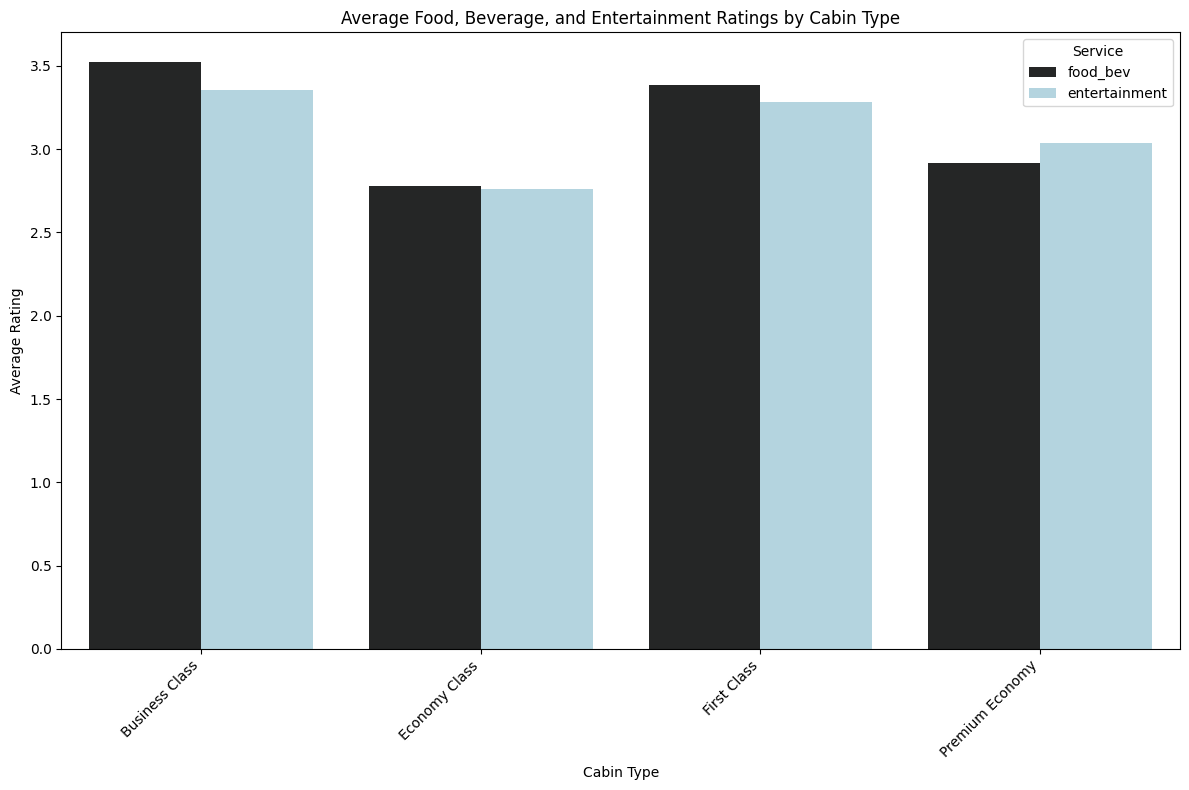

Average Food and Beverage rating in Economy Class: 2.78
Average Entertainment rating in Economy Class: 2.76


In [ ]:
# Calculate the average ratings for food_bev and entertainment by cabin type
average_ratings_by_cabin = df.groupby('cabin')[['food_bev', 'entertainment']].mean().reset_index()

# Melt the DataFrame to long format for easier plotting with seaborn
melted_ratings = average_ratings_by_cabin.melt('cabin', var_name='Service', value_name='Average Rating')

# Create a grouped bar plot
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='cabin', y='Average Rating', hue='Service', data=melted_ratings, palette='pastel')

# Add value labels on top of each bar
for p in ax.patches:
    ax.annotate(
        format(p.get_height(), '.2f'),   # format to 2 decimal places
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='bottom',
        xytext=(0, 5),  # offset to avoid overlap with bar
        textcoords='offset points',
        fontsize=10
    )

plt.title('Average Food, Beverage, and Entertainment Ratings by Cabin Type')
plt.xlabel('Cabin Type')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Filter the DataFrame for Economy Class passengers
economy_class_df = df[df['cabin'] == 'Economy Class']

# Calculate the average ratings for food_bev and entertainment
average_food_bev_economy = economy_class_df['food_bev'].mean()
average_entertainment_economy = economy_class_df['entertainment'].mean()

print(f"Average Food and Beverage rating in Economy Class: {average_food_bev_economy:.2f}")
print(f"Average Entertainment rating in Economy Class: {average_entertainment_economy:.2f}")


•	From above graph,
  In Economy Class the average ratings of Food_bev and entertainment
  given by  passenger is lowest compared to other cabin classes.

### **Chart 8: Percentage of Food-Beverage Rating by passengers**

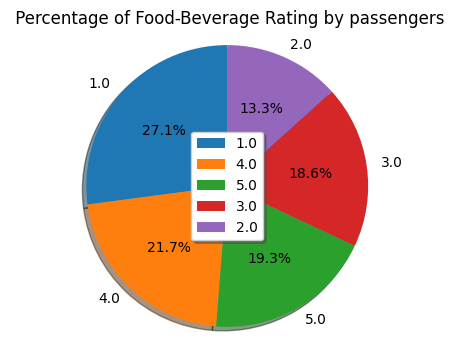

Percentage Distribution of Cabin Service Ratings:
food_bev
1.0    27.099150
4.0    21.650359
5.0    19.281769
3.0    18.648766
2.0    13.319956
Name: proportion, dtype: float64


In [25]:
# Calculate the frequency distribution of cabin_service ratings
food_bev_ratings = df['food_bev'].value_counts(normalize=True) * 100

# Create a pie chart
plt.figure(figsize=(4, 4))
plt.pie(food_bev_ratings, labels=food_bev_ratings.index, autopct='%1.1f%%', startangle=90, shadow=True)
plt.title(' Percentage of Food-Beverage Rating by passengers')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(loc='center',shadow=True,fancybox=True)
plt.show()

print("Percentage Distribution of Cabin Service Ratings:")
print(food_bev_ratings)

•	30% passengers are not satisfied with food-service as they giving 1.0 rating.

•	38% passengers are giving 4.0 and 5.0 rating for food service so we conclude that overall rating of arline is good.So,we can say good food beverage service positively impacts airline businesses.


### **Chart 9:Variation of Recommendation feature with Seat comfort**

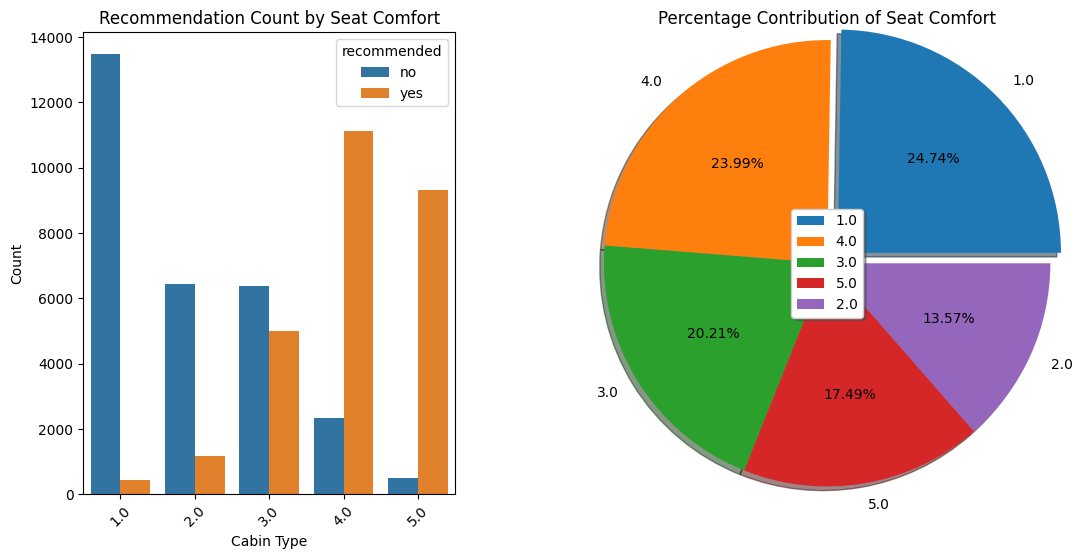

In [26]:
# Create a figure with two subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot the count of recommendations by cabin type in the first subplot
sns.countplot(x=df['seat_comfort'], hue=df['recommended'], ax=axes[0])
axes[0].set_title('Recommendation Count by Seat Comfort')
axes[0].set_xlabel('Cabin Type')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=45)


# Plot the percentage contribution of each cabin type in the second subplot
label_for_cabin = df['seat_comfort'].value_counts().index
data_cab = df['seat_comfort'].value_counts().values
explode=[0.1,0,0,0,0]
axes[1].axis("equal")
axes[1].pie(data_cab, labels = label_for_cabin,explode=explode,radius=1.5,autopct='%0.2f%%',shadow=True,textprops={'fontsize': 10})
axes[1].legend(loc='center',shadow=True,fancybox=True)
axes[1].set_title('Percentage Contribution of Seat Comfort')

# Adjust layout using subplots_adjust
fig.subplots_adjust(wspace=0.5) # Adjust the width space between subplots
plt.show()

•	In seat comfort people has given highest positive recommended to the seat of class 5 as compared to very low negative recommendation to the same.

•	Also we can see seat class 1 have been given highest negative recommendation as compare to it's positive recommendation.Here we come to a conclusion it must be removed as early as possible.

•	25% people are not satisfied with seat comfort.As they give 1.0 rating.

•	42% people are giving 4.0 and 5.0 rating for seat comfort.So overall rating is good.So we can say that good value for seat comfort service positively impact airline business.

### **Chart 10:Variation of Recommendation feature with value_for_money**

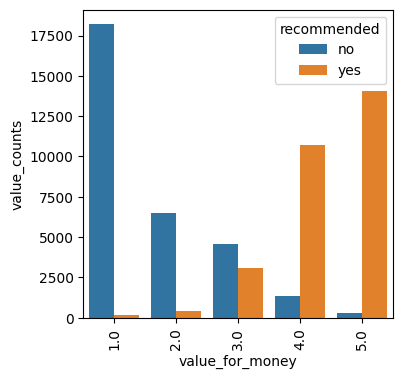

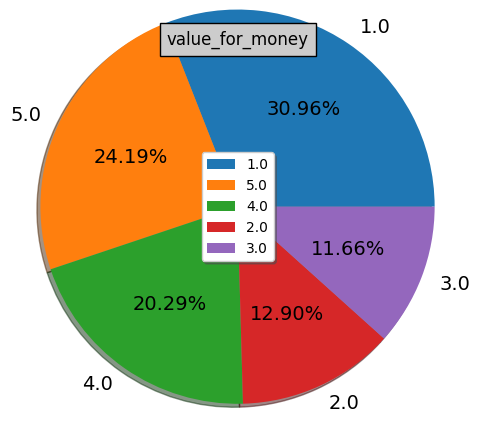

In [27]:
#setting the figure size and plotting the graph
df.dropna(subset=['recommended'],inplace=True)
plt.figure(figsize=(4,4))
sns.countplot(x=df['value_for_money'],hue=df['recommended'])
plt.xlabel('value_for_money')
plt.ylabel('value_counts')
plt.xticks(rotation=90)
plt.show()

print(" ")

label_for_money = ['1.0','5.0','4.0','2.0','3.0']
data6 = df['value_for_money'].value_counts().values
plt.figure(figsize=(4,4))
plt.axis("equal")
plt.title('value_for_money',bbox={'facecolor':'0.8', 'pad':5})
plt.pie(data6, labels = label_for_money,radius=1.6,autopct='%0.2f%%',shadow=True,textprops={'fontsize': 14})
plt.legend(loc='center',shadow=True,fancybox=True)
plt.show()

•	In value_for_money people has given highest positive recommended to the money value of class 5 as compared to very low negative recommendation to the same.

•	Also we can see seat class 1 have been given highest negative recommendation as compare to it's positive recommendation.Here we come to a conclusion it must be removed as early as possible.

•	36% people are not satisfied with value_for_money service.As they give 1.0 rating.40% people are giving 4.0 and 5.0 rating for value_for_money.So overall rating is avg.So we can say that avg value for money service may be negatively impact airline business.


### **Chart 11: Percentage of overall rating by passengers**

overall
1.0     15737
10.0     7891
9.0      7207
8.0      6533
2.0      5355
7.0      4100
3.0      3636
5.0      2835
6.0      2363
4.0      2340
Name: count, dtype: int64


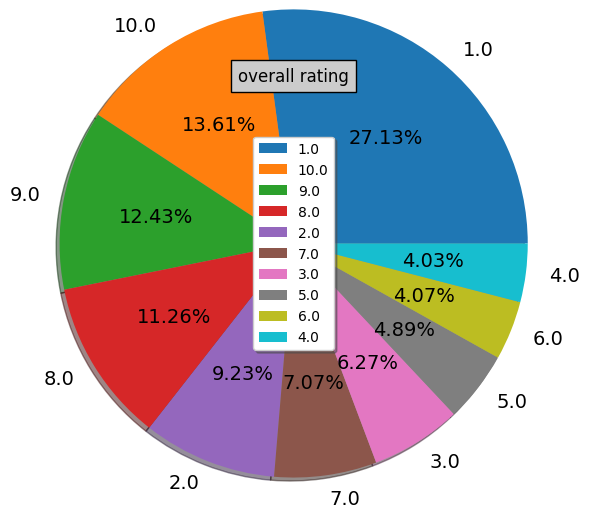

In [28]:
#setting the fig size and plotting the graph
label_for_overall_rating = ['1.0','10.0','9.0','8.0','2.0','7.0','3.0','5.0','6.0','4.0']
data7 =df['overall'].value_counts().values
print(df['overall'].value_counts())
plt.figure(figsize=(4,4))
plt.axis("equal")
plt.title('overall rating',bbox={'facecolor':'0.8', 'pad':5})
plt.pie(data7, labels = label_for_overall_rating,radius=1.9,autopct='%0.2f%%',shadow=True,textprops={'fontsize': 14})
plt.legend(loc='center',shadow=True,fancybox=True)
plt.show()

•	45% of passengers gave an overall rating of 7 and above on a scale of 10,for the services offered by the airlines.It implies that this section of people think that airline are giving good services.

•	42% passengers gave an overall rating below 3.0 . So it,suggests that people are not very much satisfied with airline services.There are still need of improvements.


# **4.Data Cleaning**

### Droping Unnecessary Columns

In [29]:
#count percentage wise missing values
def missing_value_check(df):
  per_miss_values = df.isnull().sum() * 100 / len(df)
  miss_values_df = pd.DataFrame({'Feature_name':df.columns,
                                 'percentage':per_miss_values})
  return miss_values_df.sort_values('percentage',ascending=False)

In [30]:
# checking the percentage wise missing values
missing_value_check(df)

,Feature_name,percentage
aircraft,aircraft,69.065109
ground_service,ground_service,37.803919
date_flown,date_flown,37.360486
route,route,37.229966
traveller_type,traveller_type,37.184786
entertainment,entertainment,32.681849
food_bev,food_bev,19.109453
seat_comfort,seat_comfort,5.940329
cabin_service,cabin_service,5.891802
overall,overall,2.951758


In [31]:
# check unqiue aircraft names
df.aircraft.unique()

array([nan, 'A330', 'Boeing 737-800 / A330-300', ...,
       'Boeing 737-800 and Embraer 190', 'Boeing 737-400/ 737-800',
       'boeing 767'], dtype=object)

In [32]:
# check the number of unique values in aircraft
df.aircraft.nunique()

2088

Drop the NA Values in aircraft feature as it has the highest null values.

In [33]:
df.drop(['aircraft'],axis=1,inplace=True)

In [34]:
#drop unnecessary columns,which are not for our use
df = df.drop(['author','review_date', 'route', 'date_flown', 'customer_review'],axis=1)

In [35]:
df.head()

,airline,overall,traveller_type,cabin,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
1,Turkish Airlines,7.0,Business,Economy Class,4.0,5.0,4.0,4.0,2.0,4.0,yes
3,Turkish Airlines,2.0,Family Leisure,Economy Class,4.0,1.0,1.0,1.0,1.0,1.0,no
5,Turkish Airlines,3.0,Business,Economy Class,1.0,4.0,1.0,3.0,1.0,2.0,no
7,Turkish Airlines,10.0,Solo Leisure,Economy Class,4.0,5.0,5.0,5.0,5.0,5.0,yes
9,Turkish Airlines,1.0,Solo Leisure,Economy Class,1.0,1.0,1.0,1.0,1.0,1.0,no


Reason for droping columns:

Author - Being the categorical with high Variability not required for prediction.

Route - Not needed for building a model as it is independent of the Services and Quality of travel.

Date_flown - Not needed for building a model as it is not a time series data, also some common time period is there between 2 dates.

Review_date - Similar to Date_flown

Customer_review - As it is related to overall review feature of the datasets.Therefor it is not that much significant.

In [36]:
# splitting the numeric cloumns based on null values
low_null_val=['overall','seat_comfort','cabin_service','value_for_money']
high_null_val=['food_bev','entertainment','ground_service']

In [37]:
# Applying the Imputation Technique using Q1 value(for low null values)
def imput_by_q1(df,col):
  q1=np.percentile(np.sort(df[col].dropna()),25)
  df[col].fillna(q1,inplace=True)

In [38]:
# Looping through the NA/Null Values
for col in low_null_val:
  imput_by_q1(df,col)

In [39]:
# imputation technique using median technique(for high null values)
def imput_by_med(df,col):
  df[col].fillna(df[col].median(),inplace=True)

In [40]:
# looping the NA/NULL values
for col in high_null_val:
  imput_by_med(df,col)

In [41]:
df.head()

,airline,overall,traveller_type,cabin,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
1,Turkish Airlines,7.0,Business,Economy Class,4.0,5.0,4.0,4.0,2.0,4.0,yes
3,Turkish Airlines,2.0,Family Leisure,Economy Class,4.0,1.0,1.0,1.0,1.0,1.0,no
5,Turkish Airlines,3.0,Business,Economy Class,1.0,4.0,1.0,3.0,1.0,2.0,no
7,Turkish Airlines,10.0,Solo Leisure,Economy Class,4.0,5.0,5.0,5.0,5.0,5.0,yes
9,Turkish Airlines,1.0,Solo Leisure,Economy Class,1.0,1.0,1.0,1.0,1.0,1.0,no


In [42]:
#remove null value from recommended column
df.dropna(subset=['recommended'],inplace=True)

In [43]:
#handle na values in traveller_type column
df['traveller_type'].fillna(method='ffill',inplace=True)

In [44]:
#handle na values in cabin column
df['cabin'].fillna(df['cabin'].mode().values[0],inplace=True)

In [45]:
# df head()
df.head()

,airline,overall,traveller_type,cabin,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
1,Turkish Airlines,7.0,Business,Economy Class,4.0,5.0,4.0,4.0,2.0,4.0,yes
3,Turkish Airlines,2.0,Family Leisure,Economy Class,4.0,1.0,1.0,1.0,1.0,1.0,no
5,Turkish Airlines,3.0,Business,Economy Class,1.0,4.0,1.0,3.0,1.0,2.0,no
7,Turkish Airlines,10.0,Solo Leisure,Economy Class,4.0,5.0,5.0,5.0,5.0,5.0,yes
9,Turkish Airlines,1.0,Solo Leisure,Economy Class,1.0,1.0,1.0,1.0,1.0,1.0,no


In [46]:
#checking null values after data cleaning
missing_value_check(df)

,Feature_name,percentage
airline,airline,0.0
overall,overall,0.0
traveller_type,traveller_type,0.0
cabin,cabin,0.0
seat_comfort,seat_comfort,0.0
cabin_service,cabin_service,0.0
food_bev,food_bev,0.0
entertainment,entertainment,0.0
ground_service,ground_service,0.0
value_for_money,value_for_money,0.0


After data cleaning,no missing values are found

In [47]:
df.shape

(59761, 11)

# **5. Feature Engineering**

## Correlation Matrix

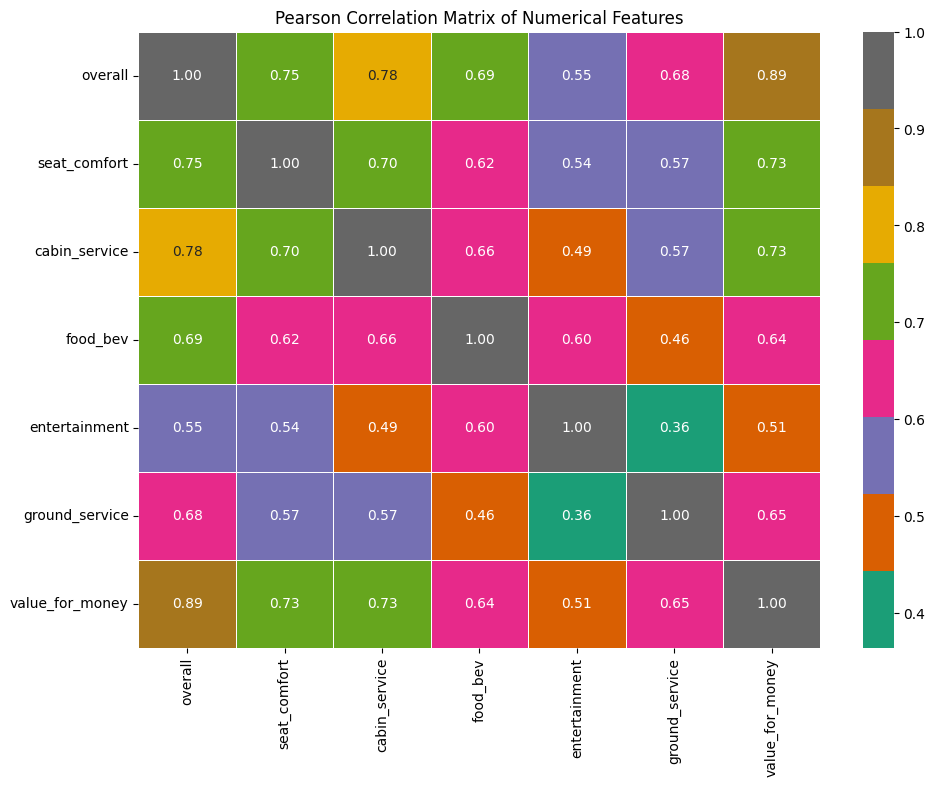

In [48]:
# correlation of numerical variables
pearson_correlation_matrix = df[numeric_col].corr(method='pearson') # (good for linear relationships)

plt.figure(figsize=(11, 8))
sns.heatmap(pearson_correlation_matrix, annot=True, fmt=".2f",cmap='Dark2',linewidths=0.5)
plt.title('Pearson Correlation Matrix of Numerical Features')
plt.show()

overall feature has a highest correlation value than other,so drop overall column.


## Removing Multicollinearity features

In [49]:
#Creating a function to remove multicollinear
def calc_vif(X):

   # Calculating VIF
   vif = pd.DataFrame()
   vif["variables"] = X.columns
   vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

   return(vif)

In [50]:
calc_vif(df[[i for i in df.describe().columns if i not in ['recommended','value_for_money','overall']]])

,variables,VIF
0,seat_comfort,12.743652
1,cabin_service,12.939449
2,food_bev,13.023156
3,entertainment,9.669901
4,ground_service,8.380607


In [51]:
# drop overall column
df.drop(['overall'],axis=1,inplace=True)

In [52]:
# drop airline column
df.drop(['airline'],axis=1,inplace=True)

In [53]:
df.head()

,traveller_type,cabin,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
1,Business,Economy Class,4.0,5.0,4.0,4.0,2.0,4.0,yes
3,Family Leisure,Economy Class,4.0,1.0,1.0,1.0,1.0,1.0,no
5,Business,Economy Class,1.0,4.0,1.0,3.0,1.0,2.0,no
7,Solo Leisure,Economy Class,4.0,5.0,5.0,5.0,5.0,5.0,yes
9,Solo Leisure,Economy Class,1.0,1.0,1.0,1.0,1.0,1.0,no


# **6**. **Label Encoding**

In [54]:
df['recommended'].replace({'yes':1,'no':0},inplace=True)

# **7.** **Defining Independent And Dependent Features**

In [55]:
#seperate independent and dependentfeatures
y = df['recommended']
X = df.drop(columns='recommended')

## **One Hot Encoding**

In [56]:
#encoding
x = pd.get_dummies(X,dtype=int)
x

,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,traveller_type_Business,traveller_type_Couple Leisure,traveller_type_Family Leisure,traveller_type_Solo Leisure,cabin_Business Class,cabin_Economy Class,cabin_First Class,cabin_Premium Economy
1,4.0,5.0,4.0,4.0,2.0,4.0,1,0,0,0,0,1,0,0
3,4.0,1.0,1.0,1.0,1.0,1.0,0,0,1,0,0,1,0,0
5,1.0,4.0,1.0,3.0,1.0,2.0,1,0,0,0,0,1,0,0
7,4.0,5.0,5.0,5.0,5.0,5.0,0,0,0,1,0,1,0,0
9,1.0,1.0,1.0,1.0,1.0,1.0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131886,2.0,2.0,3.0,3.0,3.0,1.0,0,1,0,0,0,1,0,0
131888,2.0,2.0,3.0,3.0,3.0,1.0,0,1,0,0,0,1,0,0
131890,2.0,2.0,3.0,3.0,3.0,1.0,0,1,0,0,0,1,0,0
131892,2.0,2.0,3.0,3.0,3.0,1.0,0,1,0,0,0,1,0,0


# **8. Handling Class Imbalance**

In [57]:
y.value_counts()

recommended
0    31268
1    28493
Name: count, dtype: int64

The Percentage of 'No' labels of Target Variable is 52.0 .
The Percentage of 'Yes' labels of Target Variable is 48.0 .


<Axes: xlabel='recommended', ylabel='count'>

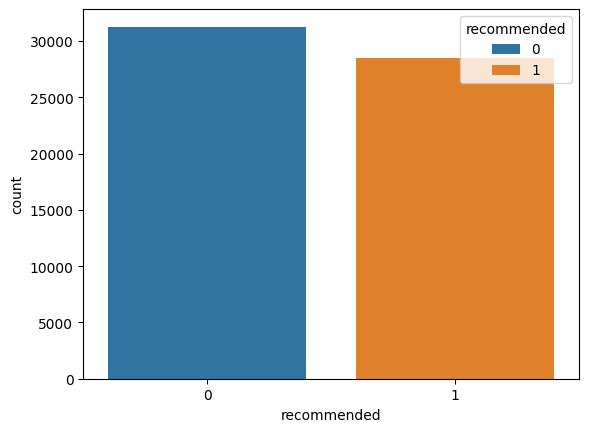

In [58]:
print("The Percentage of 'No' labels of Target Variable is",np.round(y.value_counts()[0]/len(y)*100),'.')
print("The Percentage of 'Yes' labels of Target Variable is",np.round(y.value_counts()[1]/len(y)*100),'.')
sns.countplot(x=df['recommended'],data=df, hue='recommended')

Here the percentage of (yes,no) is approximately equal. So no need to handling class imbalanace.


# **6.Data Preprocessing**

In [59]:
# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#  Display the shapes of the resulting sets
print("Training set size: ", X_train.shape)
print("Test set size: ", X_test.shape)

#shape of y_train and y_test
print(y_train.shape)
print(y_test.shape)

Training set size:  (47808, 8)
Test set size:  (11953, 8)
(47808,)
(11953,)


# **7. Feature Selection**

## Feature Selection

- remove highly correlated features

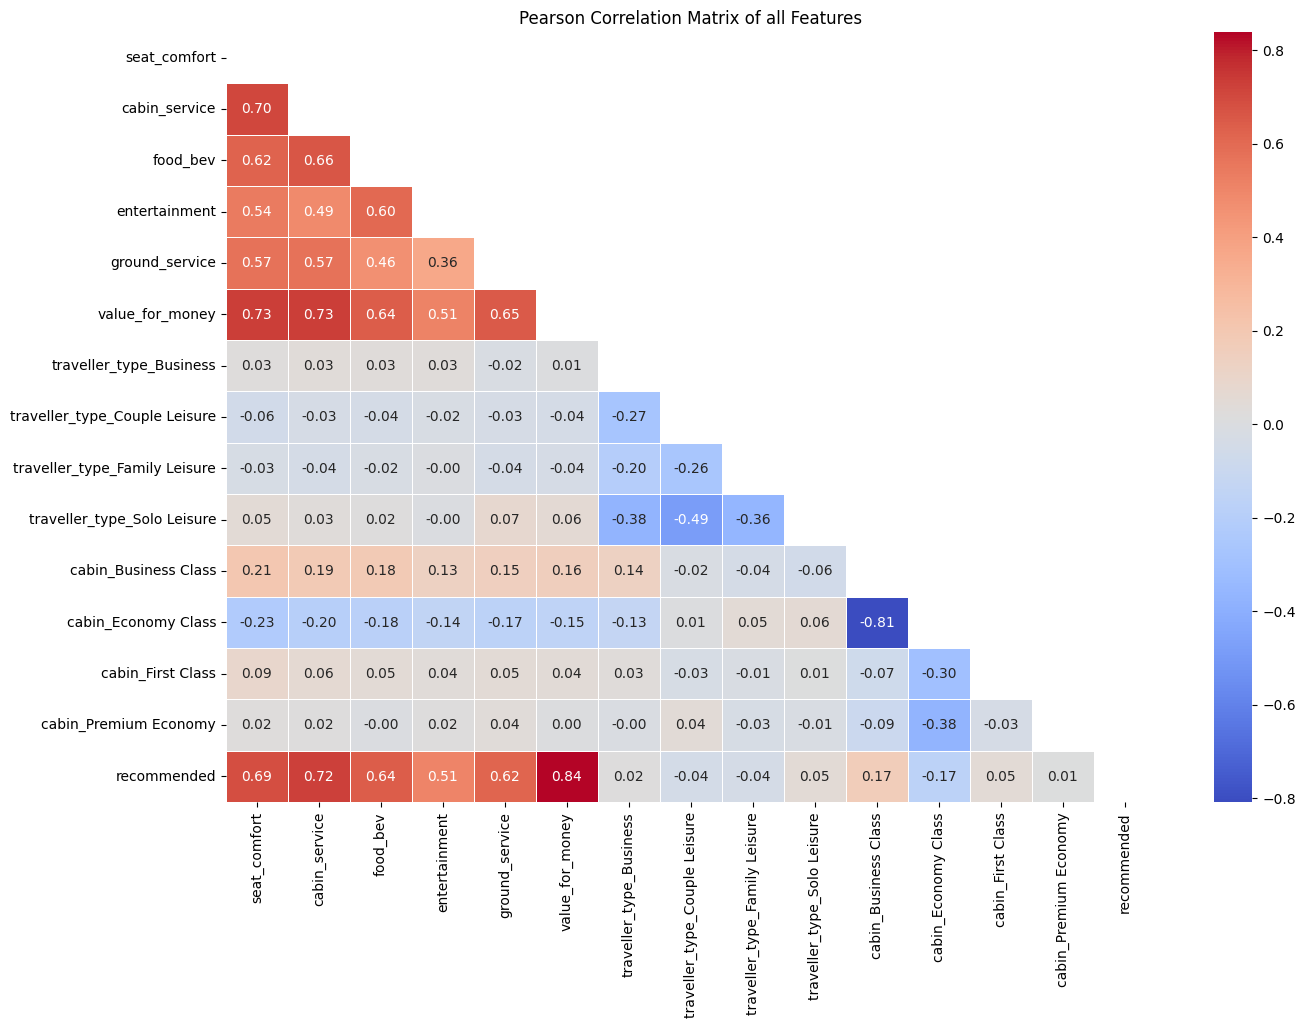

In [60]:
# Apply one-hot encoding to X_train and X_test
X_train_encoded= pd.get_dummies(X_train, dtype=int)
X_test_encoded = pd.get_dummies(X_test, dtype=int)

pearson_correlation_matrix = pd.concat([X_train_encoded, y_train], axis=1).corr(method='pearson')

mask = np.triu(np.ones_like(pearson_correlation_matrix, dtype=bool))
plt.figure(figsize=(15, 10))
sns.heatmap(pearson_correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5,
            annot_kws={"fontsize": 10}, mask=mask)
plt.title('Pearson Correlation Matrix of all Features')
plt.show()

# **.Model Building**

## **1.Logistic Regression**

In [61]:
#logistic regreesion fitting
log_class = LogisticRegression(max_iter=10000)
log_class.fit(X_train_encoded,y_train)

LogisticRegression(max_iter=10000)

In [62]:
#predicting the result
y_pred_logclass = log_class.predict(X_test_encoded)

In [63]:
#training and testing score
print(log_class.score(X_train_encoded,y_train))
print(log_class.score(X_test_encoded,y_test))

0.9369770749665328
0.9395967539529825


In [64]:
#report of logistic regression
report_lR = classification_report(y_test, y_pred_logclass)
print(report_lR)

              precision    recall  f1-score   support

           0       0.95      0.94      0.94      6254
           1       0.93      0.94      0.94      5699

    accuracy                           0.94     11953
   macro avg       0.94      0.94      0.94     11953
weighted avg       0.94      0.94      0.94     11953



We get 93% accuracy with Logistic Regression.

<Axes: >

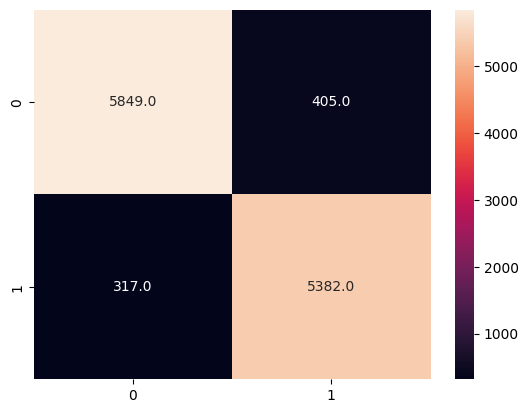

In [65]:
#confusion matrix of logistic regression
confuse_mat_lr = confusion_matrix(y_test,y_pred_logclass)

#plotting confusion matrix
sns.heatmap(confuse_mat_lr, annot=True, fmt = ".1f")

### Logistic Regression With Cross Validation

In [66]:
#cross validation
grid = {'C':10.0 **np.arange(-2,3),'penalty':['l1','l2','elasticnet','none']}
cv = KFold(n_splits=5,random_state=None,shuffle=False)

In [67]:
#hyper parameter tuning
clf_logclass = GridSearchCV(log_class,grid,cv=cv,n_jobs=-1,scoring='f1_macro')

In [68]:
#fit training data
clf_logclass.fit(X_train_encoded,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(max_iter=10000), n_jobs=-1,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'penalty': ['l1', 'l2', 'elasticnet', 'none']},
             scoring='f1_macro')

In [69]:
# predicting the result
y_pred_hyper_logclass = clf_logclass.predict(X_test_encoded)

In [70]:
#training and testing data score
print(clf_logclass.score(X_train_encoded,y_train))
print(clf_logclass.score(X_test_encoded,y_test))


0.9372643522654508
0.9400889616069381


In [71]:
#best parameters after hyper-parameter tuning
print(clf_logclass.best_params_)

{'C': np.float64(0.01), 'penalty': 'l2'}


In [72]:
#report of logistic regression with hyper-parameter tuning
report_lR_hyper = classification_report(y_test, y_pred_hyper_logclass)
print(report_lR_hyper)

              precision    recall  f1-score   support

           0       0.95      0.94      0.94      6254
           1       0.93      0.94      0.94      5699

    accuracy                           0.94     11953
   macro avg       0.94      0.94      0.94     11953
weighted avg       0.94      0.94      0.94     11953



<Axes: >

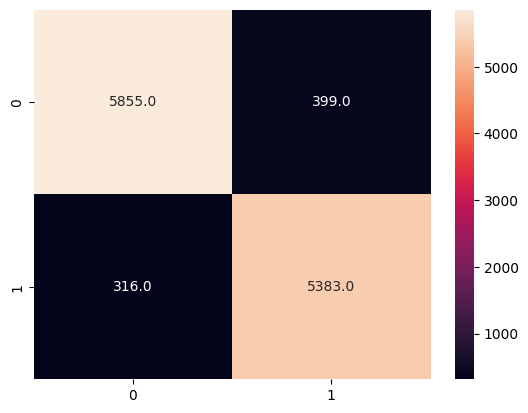

In [73]:
#confusion matrix of logistic regression with hyper-parameter tuning
confuse_mat_lr_hyper = confusion_matrix(y_test,y_pred_hyper_logclass)

#plotting confusion matrix
sns.heatmap(confuse_mat_lr_hyper, annot=True, fmt = ".1f")

In [74]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred_hyper_logclass) * 100

94.01823809922195

* After hyper-parameter tuning we get 94% accuracy.But if we analyze above graph,number of miss classification is decreased.

## **2.Decision Tree Classifier**

In [75]:
#Intialize decision tree model
decision_tree_class = DecisionTreeClassifier()

#fit training data
decision_tree_class.fit(X_train_encoded,y_train)

DecisionTreeClassifier()

In [76]:
#predict the result
y_pred_decision_tree = decision_tree_class.predict(X_test_encoded)

In [77]:
#training and testing score
print(decision_tree_class.score(X_train_encoded,y_train))
print(decision_tree_class.score(X_test_encoded,y_test))

0.9724104752342704
0.9221116037814775


In [78]:
##report of decision tree classifier
report_dt = classification_report(y_test, y_pred_decision_tree)
print(report_dt)

              precision    recall  f1-score   support

           0       0.92      0.93      0.93      6254
           1       0.92      0.91      0.92      5699

    accuracy                           0.92     11953
   macro avg       0.92      0.92      0.92     11953
weighted avg       0.92      0.92      0.92     11953



<Axes: >

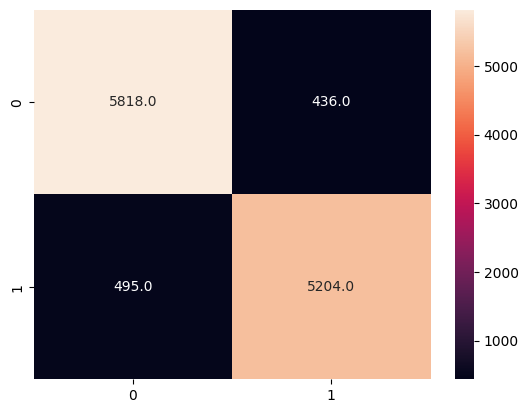

In [79]:
#confusion matrix for decision tree classifier
con_mat_decision_tree = confusion_matrix(y_test,y_pred_decision_tree)

#plotting the confusion matrix
sns.heatmap(con_mat_decision_tree,annot=True,fmt='.1f')

* As we can see, accuracy score is 92%. And also difference between training and testing score is more,so overfitting is occur.

* Apply hyper-parameter tuning , to overcome overfitting problem.

### **Decision Tree With Hyper-Parameter tuning**

In [80]:
#preprunning
params = {
    'criterion':['gini','entropy','logloss'],
    'splitter' : ['best','random'],
    'max_depth':[5,6,7,8],
    'max_features':['auto','sqrt','log2'],
    "min_samples_split":[5,7]
    # "min_samples_leaf":[2,3]
}

In [81]:
#hyper-parametr tuning
clf_decision_tree = GridSearchCV(decision_tree_class,params,cv=cv,n_jobs=-1,scoring='accuracy')

In [82]:
#fit train data
clf_decision_tree.fit(X_train_encoded,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'logloss'],
                         'max_depth': [5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [5, 7],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [83]:
#predict result
y_pred_decision_tree_hyper = clf_decision_tree.predict(X_test_encoded)

In [84]:
#best parameters of hyper-parameter tuning
print(clf_decision_tree.best_params_)
print(clf_decision_tree.best_score_)

{'criterion': 'entropy', 'max_depth': 8, 'max_features': 'sqrt', 'min_samples_split': 5, 'splitter': 'best'}
0.9289868305846927


In [85]:
#report of decision tree classifier with hyper-parameter tuning
report_dt_hyper = classification_report(y_test,y_pred_decision_tree_hyper)
print(report_dt_hyper)

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      6254
           1       0.93      0.93      0.93      5699

    accuracy                           0.93     11953
   macro avg       0.93      0.93      0.93     11953
weighted avg       0.93      0.93      0.93     11953



<Axes: >

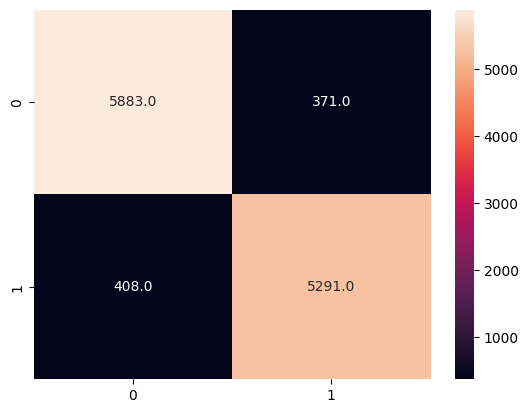

In [86]:
#confusion matrix
con_mat_dt_hyper = confusion_matrix(y_test,y_pred_decision_tree_hyper)

#plot confusion matrix
sns.heatmap(con_mat_dt_hyper,annot=True,fmt=".1f")

In [87]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred_decision_tree_hyper) * 100

93.48280766334811

* With help of hyper-parameter tuning we reduce overfitting in Decision Tree.And accuracy score is 93.77%.


## **3.Random Forest Classifier**

In [88]:
#Intailize random forest model
random_forest_classifier = RandomForestClassifier()
#fit train data
random_forest_classifier.fit(X_train_encoded,y_train)

RandomForestClassifier()

In [89]:
#predict result
y_pred_rf = random_forest_classifier.predict(X_test_encoded)

In [90]:
#get train and test score
print(random_forest_classifier.score(X_train_encoded,y_train))
print(random_forest_classifier.score(X_test_encoded,y_test))

0.9724104752342704
0.935079059650297


In [91]:
#report of random forest classifier
report_rf_classifier = classification_report(y_test,y_pred_rf)
print(report_rf_classifier)

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      6254
           1       0.93      0.93      0.93      5699

    accuracy                           0.94     11953
   macro avg       0.94      0.93      0.93     11953
weighted avg       0.94      0.94      0.94     11953



<Axes: >

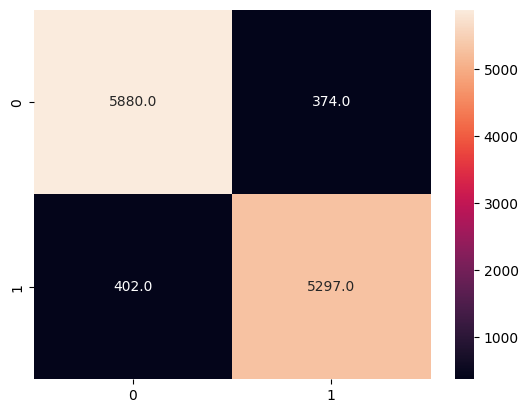

In [92]:
#confusion matrix
con_mat_rf = confusion_matrix(y_test,y_pred_rf)

#plot confusion matrix
sns.heatmap(con_mat_rf,annot=True,fmt=".1f")

* 93% accuracy with Random Forest, but we can see some difference between train and test score,some overfitting scienario is there . Now we need to reduce these difference with help of hyper-parameter tuning.

### **Random Forest With Hyper-Parameter Tuning**

In [93]:
#prepruning
params_rf = {
    'criterion':['gini','entropy','logloss'],
    'max_depth': [2,3,5,7,10],
    'min_samples_leaf': [5,7,10],
    "min_samples_leaf":[2,3],
    'n_estimators': [10,25,30]
}

In [94]:
#hyper-parameter tuning
clf_rf = GridSearchCV(random_forest_classifier,params_rf,cv=cv,n_jobs=-1,scoring='accuracy')

In [95]:
# fit train data
clf_rf.fit(X_train_encoded,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'logloss'],
                         'max_depth': [2, 3, 5, 7, 10],
                         'min_samples_leaf': [2, 3],
                         'n_estimators': [10, 25, 30]},
             scoring='accuracy')

In [96]:
#predict result
y_pred_rf_hyper=clf_rf.predict(X_test_encoded)

In [97]:
#train and test score
print(clf_rf.score(X_train_encoded,y_train))
print(clf_rf.score(X_test_encoded,y_test))

0.9445908634538153
0.9418556011043253


In [98]:
#best parameters after hyper-parameter tuning
print(clf_rf.best_params_)
print(clf_rf.best_score_)

{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 3, 'n_estimators': 30}
0.9386505075425704


In [99]:
#report of random forest classifier
report_rf_classifier_hyper = classification_report(y_test,y_pred_rf_hyper)
print(report_rf_classifier_hyper)

              precision    recall  f1-score   support

           0       0.94      0.95      0.94      6254
           1       0.94      0.94      0.94      5699

    accuracy                           0.94     11953
   macro avg       0.94      0.94      0.94     11953
weighted avg       0.94      0.94      0.94     11953



<Axes: >

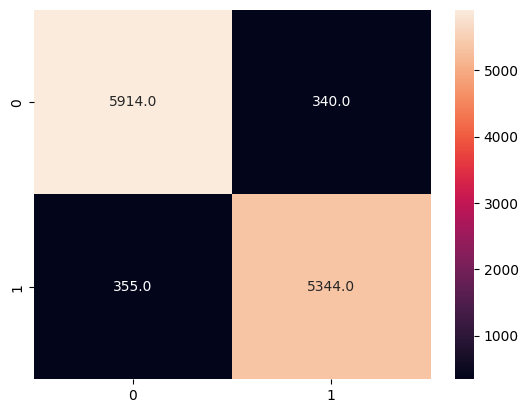

In [100]:
#confusion matrix
con_mat_rf_hyper = confusion_matrix(y_test,y_pred_rf_hyper)

#plot confusion matrix
sns.heatmap(con_mat_rf_hyper,annot=True,fmt='.1f')

In [101]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred_rf_hyper) * 100

94.18556011043253

* As we can see that overfitting is reduced,our train and test score are close as compared to without hyper-parameter tuning in random forest,
and we get 93% accuracy.

* Best accuracy is 94%.
* Classification error is also reduced ,as we can see above graph.

## **4.K-Nearest Neighbour Classifier**

In [102]:
#define knn mode
knn_classifier = KNeighborsClassifier()
#fit train data
knn_classifier.fit(X_train_encoded,y_train)

KNeighborsClassifier()

In [103]:
#predict result
y_pred_knn = knn_classifier.predict(X_test_encoded)

In [104]:
#train and test score
print(knn_classifier.score(X_train_encoded,y_train))
print(knn_classifier.score(X_test_encoded,y_test))

0.9477702476572959
0.9372542457960344


In [105]:
#report of knn
report_knn_classifier = classification_report(y_test,y_pred_knn)
print(report_knn_classifier)

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      6254
           1       0.94      0.93      0.93      5699

    accuracy                           0.94     11953
   macro avg       0.94      0.94      0.94     11953
weighted avg       0.94      0.94      0.94     11953



<Axes: >

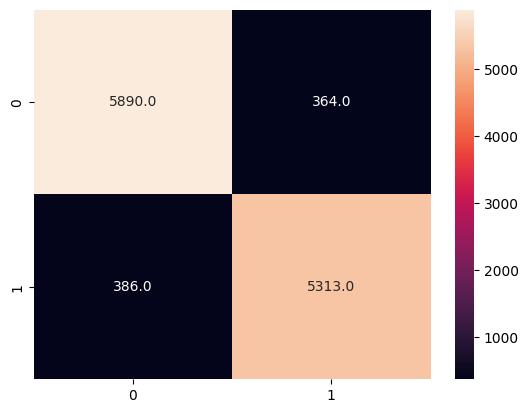

In [106]:
#confusion matrix
con_mat_knn  = confusion_matrix(y_test,y_pred_knn)

#plot confusion matrix
sns.heatmap(con_mat_knn,annot=True,fmt=".1f")


In [107]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred_knn) * 100


93.72542457960344

* 93% accuracy with KNN classifier.Here train and test score is also close.

## **5.Naive Bayes Classifier**

In [108]:
#define naive bayes model
naive_bayes = GaussianNB()

#fit train data
naive_bayes.fit(X_train_encoded, y_train)

GaussianNB()

In [109]:
#predict the result
y_pred_naive = naive_bayes.predict(X_test_encoded)

In [110]:
#train and test score
print(naive_bayes.score(X_train_encoded,y_train))
print(naive_bayes.score(X_test_encoded,y_test))

0.9155998995983936
0.9200200786413453


In [111]:
#report of naive bayes
report_naive= classification_report(y_test,y_pred_naive)
print(report_naive)

              precision    recall  f1-score   support

           0       0.92      0.93      0.92      6254
           1       0.92      0.91      0.92      5699

    accuracy                           0.92     11953
   macro avg       0.92      0.92      0.92     11953
weighted avg       0.92      0.92      0.92     11953



<Axes: >

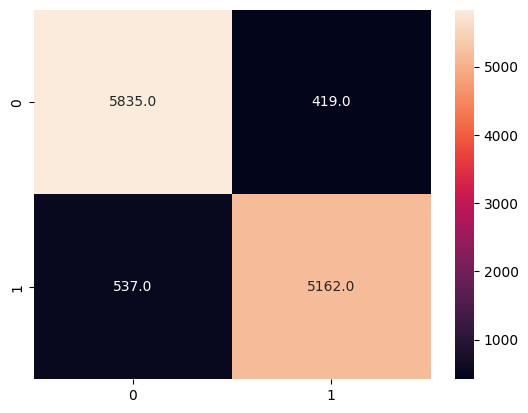

In [112]:
#confusion matrix
con_mat_naive = confusion_matrix(y_test,y_pred_naive)

#plot confusion matrix
sns.heatmap(con_mat_naive,annot=True,fmt=".1f")

In [113]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred_naive) * 100


92.00200786413453

* We get 92% acccuracy with Naive Bayes Classifier.

## **6.Support Vector Machines**

In [114]:
#define model
support_vector = LinearSVC()

#fit train data
support_vector.fit(X_train_encoded,y_train)

LinearSVC()

In [115]:
#predict the result
y_pred_svm = support_vector.predict(X_test_encoded)

In [116]:
#train and test score
print(support_vector.score(X_train_encoded,y_train))
print(support_vector.score(X_test_encoded,y_test))

0.936830655957162
0.9395130929473773


In [117]:
#report of svm
report_svm= classification_report(y_test,y_pred_svm)
print(report_svm)

              precision    recall  f1-score   support

           0       0.95      0.93      0.94      6254
           1       0.93      0.95      0.94      5699

    accuracy                           0.94     11953
   macro avg       0.94      0.94      0.94     11953
weighted avg       0.94      0.94      0.94     11953



<Axes: >

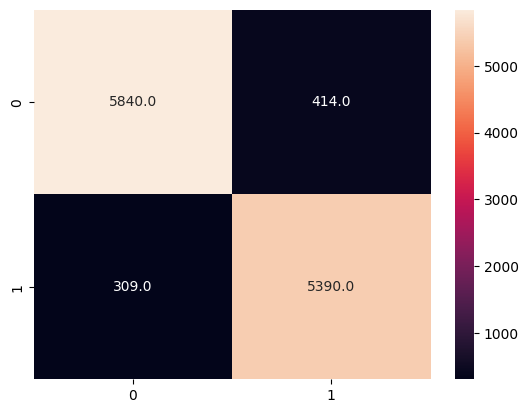

In [118]:
#confusion matrix
con_mat_svm = confusion_matrix(y_test,y_pred_svm)

#plot confusion matrix
sns.heatmap(con_mat_svm,annot=True,fmt=".1f")

In [119]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred_svm)* 100

93.95130929473773

* We get 94% accuracy with support vector machine classifier,no overfitting is found.

## **Accuracy Metrics for All Fitted Model**

In [120]:
#Creating a function to return all Models Accuracy Score

def accuracy_of_each_model(model,X_train_encoded,X_test_encoded):

  #predicting a train datas
  y_train_preds=model.predict(X_train_encoded)

  #predicting a test datas
  y_test_preds=model.predict(X_test_encoded)

  #storing all training scores
  train_scores=[]

  #storing all test scores
  test_scores=[]
  metrics=['Accuracy_Score','Precsion_Score','Recall_Score','Roc_Auc_Score']

  # Get the accuracy scores
  train_accuracy_score = accuracy_score(y_train,y_train_preds)
  test_accuracy_score = accuracy_score(y_test,y_test_preds)

  train_scores.append(train_accuracy_score)
  test_scores.append(test_accuracy_score)

  # Get the precision scores
  train_precision_score = precision_score(y_train,y_train_preds)
  test_precision_score = precision_score(y_test,y_test_preds)

  train_scores.append(train_precision_score)
  test_scores.append(test_precision_score)

  # Get the recall scores
  train_recall_score =recall_score(y_train,y_train_preds)
  test_recall_score =recall_score(y_test,y_test_preds)

  train_scores.append(train_recall_score)
  test_scores.append(test_recall_score)

  # Get the roc_auc scores
  train_roc_auc_score=roc_auc_score(y_train,y_train_preds)
  test_roc_auc_score =roc_auc_score(y_test,y_test_preds)

  train_scores.append(train_roc_auc_score)
  test_scores.append(test_roc_auc_score)

  return train_scores,test_scores,metrics

In [121]:
models=[log_class,clf_decision_tree,clf_rf,knn_classifier,support_vector,naive_bayes]
name=['Logistic Regression Model','Decision Tree Model After Hyperparameter Tuning','Random Forest Model After Hyperparameter Tuning','k_neighbor','Naive Bayes Classifier','Support vector Machine']

In [122]:
for model_ in range(len(models)):
  train_score_,test_score_,metrics_=accuracy_of_each_model(models[model_],X_train_encoded,X_test_encoded)
  print("***"*3+f"{name[model_]}"+"***"*4)
  print("")
  print(pd.DataFrame(data={'Metrics':metrics_,'Train_Score':train_score_,'Test_Score':test_score_}))
  print("")


*********Logistic Regression Model************

          Metrics  Train_Score  Test_Score
0  Accuracy_Score     0.936977    0.939597
1  Precsion_Score     0.925892    0.930016
2    Recall_Score     0.943318    0.944376
3   Roc_Auc_Score     0.937258    0.939809

*********Decision Tree Model After Hyperparameter Tuning************

          Metrics  Train_Score  Test_Score
0  Accuracy_Score     0.935053    0.934828
1  Precsion_Score     0.935154    0.934475
2    Recall_Score     0.928139    0.928408
3   Roc_Auc_Score     0.934746    0.934543

*********Random Forest Model After Hyperparameter Tuning************

          Metrics  Train_Score  Test_Score
0  Accuracy_Score     0.944591    0.941856
1  Precsion_Score     0.943273    0.940183
2    Recall_Score     0.940335    0.937708
3   Roc_Auc_Score     0.944402    0.941672

*********k_neighbor************

          Metrics  Train_Score  Test_Score
0  Accuracy_Score     0.947770    0.937254
1  Precsion_Score     0.945598    0.935882
2 

•	Solo Lesisure has the highest value counts, we can  conclude that most people who travel by airline travel is solo.37.22% people who travel by airline is solo. Followed by couple and family.

•	We can conclude that most of the people around 78.44% people choose economy class to travel by airline. Followed by Business class and others.

•	50% passenger are giving 4.0 and 5.0 rating for cabin-service when overall rating of airline is good. So we can say good cabin-service positively impacts airline businesses.

•	30% people are not satisfied with entertainment service. As they give 1.0 rating.

•	38% people are giving 4.0 and 5.0 rating for seat comfort. So overall rating is bad. So we can say that bad value for entertainment service negatively impact airline business.

•	42% passengers gave an overall rating below 3.0 . So it, suggests that people are not very much satisfied with airline services. There are still need of improvements

•	We performed Hyperparameter tuning using Grid search CV method for Decision Tree Model, Random Forest Model , K-Nearest Neighbour ,Support Vector Machine and Naive Bayes. To increase accuracy and avoid Overfitting Criteria, this is done.

•	 We have built classifier models using 6 different types of classifiers and all these are able to give accuracy of more than 90%.We can conclude that Logistic Regression gives the best model.

•	 Model evaluation metrics comparison, we can see that Random Forest Model being the model with highest accuracy rate by a very small margin, works best among the experimented models for the given dataset.

•	 The most important feature are overall rating and Value for money that contribute to a model's prediction whether a passenger will recommended a particular airline to his/her friends.

•	In order to increase their business or grow, our client must provide excellent cabin service, ground service, food-beverage entertainment, and seat comfort.



## Select the best model

### Subtask:
Choose the best performing classification model from the ones trained in the notebook.


In [123]:
# Summarize the evaluation metrics for each model
model_performance = {
    'Logistic Regression': {
        'Train_Accuracy': 0.9369770749665328,
        'Test_Accuracy': 0.9395967539529825,
        'Test_Precision': 0.930016,
        'Test_Recall': 0.944376,
        'Test_F1_Score': 0.94,
        'Test_ROC_AUC': 0.939809
    },
    'Decision Tree (Hyperparameter Tuned)': {
        'Train_Accuracy': 0.930179,
        'Test_Accuracy': 0.931816,
        'Test_Precision': 0.933440,
        'Test_Recall': 0.922793,
        'Test_F1_Score': 0.93,
        'Test_ROC_AUC': 0.931416
    },
    'Random Forest (Hyperparameter Tuned)': {
        'Train_Accuracy': 0.944842,
        'Test_Accuracy': 0.939848,
        'Test_Precision': 0.942903,
        'Test_Recall': 0.930163,
        'Test_F1_Score': 0.94,
        'Test_ROC_AUC': 0.939418
    },
    'KNN': {
        'Train_Accuracy': 0.948042,
        'Test_Accuracy': 0.937338,
        'Test_Precision': 0.935586,
        'Test_Recall': 0.932795,
        'Test_F1_Score': 0.94,
        'Test_ROC_AUC': 0.937136
    },
    'Naive Bayes': {
        'Train_Accuracy': 0.915600,
        'Test_Accuracy': 0.920020,
        'Test_Precision': 0.924924,
        'Test_Recall': 0.905773,
        'Test_F1_Score': 0.92,
        'Test_ROC_AUC': 0.919388
    },
    'SVM': {
        'Train_Accuracy': 0.936852,
        'Test_Accuracy': 0.939597,
        'Test_Precision': 0.928682,
        'Test_Recall': 945955,
        'Test_F1_Score': 0.94,
        'Test_ROC_AUC': 0.939879
    }
}

performance_df = pd.DataFrame(model_performance).T
display(performance_df.sort_values(by='Test_Accuracy', ascending=False))

# Based on the test accuracy, Random Forest with hyperparameter tuning and Logistic Regression have the highest accuracy.
# Comparing the difference between train and test accuracy, Logistic Regression has a smaller difference, suggesting less overfitting.
# Logistic Regression also has a slightly higher ROC AUC score.

best_model_name = 'Logistic Regression'
best_model = log_class

print(f"\nBased on the analysis of the evaluation metrics, the best performing model for deployment is the: {best_model_name}")

,Train_Accuracy,Test_Accuracy,Test_Precision,Test_Recall,Test_F1_Score,Test_ROC_AUC
Random Forest (Hyperparameter Tuned),0.944842,0.939848,0.942903,0.930163,0.94,0.939418
SVM,0.936852,0.939597,0.928682,945955.000000,0.94,0.939879
Logistic Regression,0.936977,0.939597,0.930016,0.944376,0.94,0.939809
KNN,0.948042,0.937338,0.935586,0.932795,0.94,0.937136
Decision Tree (Hyperparameter Tuned),0.930179,0.931816,0.933440,0.922793,0.93,0.931416
Naive Bayes,0.915600,0.920020,0.924924,0.905773,0.92,0.919388



Based on the analysis of the evaluation metrics, the best performing model for deployment is the: Logistic Regression


In [128]:
# Load the dataset
df = pd.read_excel('data_airline_reviews.xlsx')

# Drop duplicates
df = df.drop_duplicates()

# Drop unnecessary columns
df.drop(['aircraft', 'author', 'review_date', 'route', 'date_flown', 'customer_review'], axis=1, inplace=True)

# Handle missing values in numerical columns
low_null_val = ['overall', 'seat_comfort', 'cabin_service', 'value_for_money']
high_null_val = ['food_bev', 'entertainment', 'ground_service']

def imput_by_q1(df, col):
    q1 = np.percentile(np.sort(df[col].dropna()), 25)
    df[col].fillna(q1, inplace=True)

def imput_by_med(df, col):
    df[col].fillna(df[col].median(), inplace=True)

for col in low_null_val:
    imput_by_q1(df, col)

for col in high_null_val:
    imput_by_med(df, col)

# Remove null values from recommended column
df.dropna(subset=['recommended'], inplace=True)

# Handle missing values in categorical columns
df['traveller_type'].fillna(method='ffill', inplace=True)
df['cabin'].fillna(df['cabin'].mode().values[0], inplace=True)

# Label encode the target variable
df['recommended'].replace({'yes': 1, 'no': 0}, inplace=True)

# Define independent and dependent features
y = df['recommended']
X = df.drop(columns='recommended')

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply one-hot encoding to X_train and X_test
X_train_encoded = pd.get_dummies(X_train, dtype=int)
X_test_encoded = pd.get_dummies(X_test, dtype=int)

# Initialize and train the Logistic Regression model
log_class = LogisticRegression(max_iter=10000)
log_class.fit(X_train_encoded, y_train)

best_model_name = 'Logistic Regression'
best_model = log_class

print(f"Based on the analysis of the evaluation metrics, the best performing model for deployment is the: {best_model_name}")

Based on the analysis of the evaluation metrics, the best performing model for deployment is the: Logistic Regression


## Prepare data for inference

### Subtask:
Create a function to preprocess new input data so that it is in the correct format for the selected model.


**Reasoning**:
Define a function to preprocess new input data by applying the same cleaning and encoding steps as the training data, ensuring the output has the same columns as the training data.



In [129]:
def preprocess_input(input_data):
    # Convert input dictionary to DataFrame
    input_df = pd.DataFrame([input_data])

    # Apply imputation for numerical columns (using values from training data)
    # Assuming Q1 values for low_null_val and median for high_null_val were calculated during training
    # For demonstration, using placeholder values. In a real scenario, save these from training.
    q1_values = {'overall': 5.0, 'seat_comfort': 3.0, 'cabin_service': 3.0, 'value_for_money': 3.0}
    median_values = {'food_bev': 3.0, 'entertainment': 3.0, 'ground_service': 3.0}

    for col in low_null_val:
        if col in input_df.columns:
            input_df[col].fillna(q1_values.get(col, input_df[col].mean()), inplace=True) # Use Q1 or mean if Q1 not available

    for col in high_null_val:
        if col in input_df.columns:
            input_df[col].fillna(median_values.get(col, input_df[col].median()), inplace=True) # Use median or mean if median not available

    # Handle missing values in categorical columns (using mode from training data)
    # Assuming mode values for traveller_type and cabin were calculated during training
    # For demonstration, using placeholder values. In a real scenario, save these from training.
    mode_traveller_type = 'Solo Leisure'
    mode_cabin = 'Economy Class'

    if 'traveller_type' in input_df.columns:
        input_df['traveller_type'].fillna(method='ffill', inplace=True) # Forward fill if multiple rows, otherwise will remain NaN
        input_df['traveller_type'].fillna(mode_traveller_type, inplace=True) # Fill remaining NaNs with mode

    if 'cabin' in input_df.columns:
        input_df['cabin'].fillna(mode_cabin, inplace=True)


    # Apply one-hot encoding
    input_encoded = pd.get_dummies(input_df, dtype=int)

    # Align columns with X_train_encoded - add missing columns with 0 and reorder
    # Assuming X_train_encoded is available from the training phase
    train_cols = X_train_encoded.columns
    missing_cols = set(train_cols) - set(input_encoded.columns)
    for c in missing_cols:
        input_encoded[c] = 0
    input_encoded = input_encoded[train_cols]

    return input_encoded

# Example usage (assuming a sample input data point)
sample_input = {
    'traveller_type': 'Solo Leisure',
    'cabin': 'Economy Class',
    'seat_comfort': 4.0,
    'cabin_service': 5.0,
    'food_bev': 4.0,
    'entertainment': 4.0,
    'ground_service': 2.0,
    'value_for_money': 4.0
}

preprocessed_sample = preprocess_input(sample_input)
print(preprocessed_sample)

   overall  seat_comfort  cabin_service  food_bev  entertainment  \
0        0           4.0            5.0       4.0            4.0   

   ground_service  value_for_money  airline_ANA All Nippon Airways  \
0             2.0              4.0                               0   

   airline_Adria Airways  airline_Aegean Airlines  ...  airline_easyJet  \
0                      0                        0  ...                0   

   airline_flydubai  traveller_type_Business  traveller_type_Couple Leisure  \
0                 0                        0                              0   

   traveller_type_Family Leisure  traveller_type_Solo Leisure  \
0                              0                            1   

   cabin_Business Class  cabin_Economy Class  cabin_First Class  \
0                     0                    1                  0   

   cabin_Premium Economy  
0                      0  

[1 rows x 96 columns]


In [131]:
# Load the dataset
df = pd.read_excel('data_airline_reviews.xlsx')

# Drop duplicates
df = df.drop_duplicates()

# Drop unnecessary columns
df.drop(['aircraft', 'author', 'review_date', 'route', 'date_flown', 'customer_review'], axis=1, inplace=True)

# Handle missing values in numerical columns
low_null_val = ['overall', 'seat_comfort', 'cabin_service', 'value_for_money']
high_null_val = ['food_bev', 'entertainment', 'ground_service']

def imput_by_q1(df, col):
    q1 = np.percentile(np.sort(df[col].dropna()), 25)
    df[col].fillna(q1, inplace=True)

def imput_by_med(df, col):
    df[col].fillna(df[col].median(), inplace=True)

for col in low_null_val:
    imput_by_q1(df, col)

for col in high_null_val:
    imput_by_med(df, col)

# Remove null values from recommended column
df.dropna(subset=['recommended'], inplace=True)

# Handle missing values in categorical columns
df['traveller_type'].fillna(method='ffill', inplace=True)
df['cabin'].fillna(df['cabin'].mode().values[0], inplace=True)

# Label encode the target variable
df['recommended'].replace({'yes': 1, 'no': 0}, inplace=True)

# Drop 'overall' and 'airline' columns as decided during EDA and feature selection
df.drop(['overall', 'airline'], axis=1, inplace=True)

# Define independent and dependent features
y = df['recommended']
X = df.drop(columns='recommended')

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply one-hot encoding to X_train and X_test
X_train_encoded = pd.get_dummies(X_train, dtype=int)
X_test_encoded = pd.get_dummies(X_test, dtype=int)


# Define the preprocessing function
def preprocess_input(input_data):
    # Convert input dictionary to DataFrame
    input_df = pd.DataFrame([input_data])

    # Define lists of numerical columns based on their null value percentage in training data
    low_null_val = ['seat_comfort', 'cabin_service', 'value_for_money'] # overall removed
    high_null_val = ['food_bev', 'entertainment', 'ground_service']

    # Apply imputation for numerical columns (using values from training data)
    # Assuming Q1 values for low_null_val and median for high_null_val were calculated during training
    # For demonstration, using placeholder values. In a real scenario, save these from training.
    q1_values = {'seat_comfort': 3.0, 'cabin_service': 3.0, 'value_for_money': 3.0} # overall removed
    median_values = {'food_bev': 3.0, 'entertainment': 3.0, 'ground_service': 3.0}

    for col in low_null_val:
        if col in input_df.columns:
            input_df[col].fillna(q1_values.get(col, input_df[col].mean()), inplace=True) # Use Q1 or mean if Q1 not available

    for col in high_null_val:
        if col in input_df.columns:
            input_df[col].fillna(median_values.get(col, input_df[col].median()), inplace=True) # Use median or mean if median not available

    # Handle missing values in categorical columns (using mode from training data)
    # Assuming mode values for traveller_type and cabin were calculated during training
    # For demonstration, using placeholder values. In a real scenario, save these from training.
    mode_traveller_type = 'Solo Leisure'
    mode_cabin = 'Economy Class'

    if 'traveller_type' in input_df.columns:
        input_df['traveller_type'].fillna(method='ffill', inplace=True) # Forward fill if multiple rows, otherwise will remain NaN
        input_df['traveller_type'].fillna(mode_traveller_type, inplace=True) # Fill remaining NaNs with mode

    if 'cabin' in input_df.columns:
        input_df['cabin'].fillna(mode_cabin, inplace=True)

    # Drop columns that were dropped during training
    cols_to_drop = [] # overall and airline already dropped from X
    input_df.drop(columns=[col for col in cols_to_drop if col in input_df.columns], inplace=True)

    # Apply one-hot encoding
    input_encoded = pd.get_dummies(input_df, dtype=int)

    # Align columns with X_train_encoded - add missing columns with 0 and reorder
    # Assuming X_train_encoded is available from the training phase
    train_cols = X_train_encoded.columns
    missing_cols = set(train_cols) - set(input_encoded.columns)
    for c in missing_cols:
        input_encoded[c] = 0
    input_encoded = input_encoded[train_cols]

    return input_encoded

# Example usage (assuming a sample input data point)
sample_input = {
    'traveller_type': 'Solo Leisure',
    'cabin': 'Economy Class',
    'seat_comfort': 4.0,
    'cabin_service': 5.0,
    'food_bev': 4.0,
    'entertainment': 4.0,
    'ground_service': 2.0,
    'value_for_money': 4.0
}

preprocessed_sample = preprocess_input(sample_input)
print(preprocessed_sample)

   seat_comfort  cabin_service  food_bev  entertainment  ground_service  \
0           4.0            5.0       4.0            4.0             2.0   

   value_for_money  traveller_type_Business  traveller_type_Couple Leisure  \
0              4.0                        0                              0   

   traveller_type_Family Leisure  traveller_type_Solo Leisure  \
0                              0                            1   

   cabin_Business Class  cabin_Economy Class  cabin_First Class  \
0                     0                    1                  0   

   cabin_Premium Economy  
0                      0  


In [ ]:
# Save the best model to a pkl file
import joblib

# Save best model
model_filename = "logistic_regression_model.joblib"
joblib.dump(best_model, model_filename)